# <span style="color:red"> Data storage on SqLite </span>

In [1]:
import pandas as pd

dataG = pd.read_csv("political_news1.csv")
dataT = pd.read_csv("sorted_data.csv")


In [2]:
import sqlite3

connection = sqlite3.connect("news.db")


In [3]:
# Create the tweets table
create_tweets_table_query = """
CREATE TABLE IF NOT EXISTS tweets (
    id INTEGER PRIMARY KEY,
    AccountName TEXT,
    Date TEXT,
    TweetText TEXT,
    Links TEXT,
    Images TEXT
);
"""
connection.execute(create_tweets_table_query)

# Iterate through rows and insert data into the tweets table
for index, row in dataT.iterrows():
    insert_data_query = """
    INSERT INTO tweets (AccountName, Date, TweetText, Links, Images)
    VALUES (?, ?, ?, ?, ?);
    """
    data_tuple = (row["Account Name"], row["Date"], row["Tweet Text"], row["Links"], row["Images"])
    connection.execute(insert_data_query, data_tuple)

# Commit changes and close the connection
connection.commit()



In [4]:
import sqlite3

# Connect to the SQLite database
connection = sqlite3.connect("news.db")
cursor = connection.cursor()
cursor.execute("DROP TABLE IF EXISTS articles;")
connection.commit()

# Create the articles table if it doesn't exist
create_articles_table_query = """
CREATE TABLE IF NOT EXISTS articles (
    id INTEGER PRIMARY KEY,
    Title TEXT,
    Link TEXT,
    Date TEXT,
    Image TEXT
);
"""
cursor.execute(create_articles_table_query)

# Iterate through rows and insert data into the articles table
for index, row in dataG.iterrows():
    insert_data_query = """
    INSERT INTO articles (Title, Link, Date, Image)
    VALUES (?, ?, ?, ?);
    """
    data_tuple = (row["Title"], row["Link"], row["Date"], row["Image"])
    cursor.execute(insert_data_query, data_tuple)

# Commit changes and close the connection
connection.commit()
connection.close()


In [5]:
# Connect to the database
connection = sqlite3.connect("news.db")
cursor = connection.cursor()

# Execute a SELECT query
select_query = "SELECT * FROM articles;"
cursor.execute(select_query)
results = cursor.fetchall()

# Process and print the results
for row in results:
    print(row)

# Close the connection
connection.close()


(1, "U.S-China Rivalry Plays Out in Vanuatu's Politics", 'https://news.google.com/articles/CBMiU2h0dHBzOi8vZm9yZWlnbnBvbGljeS5jb20vMjAyMy8wOC8yOC92YW51YXR1LXVzLWNoaW5hLWNvbXBldGl0aW9uLXBhY2lmaWMtc2VjdXJpdHkv0gEA?hl=en-US&gl=US&ceid=US%3Aen', '2023-08-28', 'https://encrypted-tbn2.gstatic.com/faviconV2?url=https://www.fmprc.gov.cn&client=NEWS_360&size=96&type=FAVICON&fallback_opts=TYPE,SIZE,URL')
(2, "Foreign Ministry Spokesperson Wang Wenbin's Regular Press ...", 'https://news.google.com/articles/CBMiVGh0dHBzOi8vd3d3LmZtcHJjLmdvdi5jbi9lbmcveHdmd182NjUzOTkvczI1MTBfNjY1NDAxLzIwMjMwOC90MjAyMzA4MjlfMTExMzQ4ODYuaHRtbNIBAA?hl=en-US&gl=US&ceid=US%3Aen', '2023-08-29', 'https://lh3.googleusercontent.com/proxy/OnATUbWPEbrcfnGlgMFCt1o2M8LkQmqbhnh08NYjGyoA0zAIq5QOc073EfHEjjqNoU2JnL07KL3YkFMHNyQMHbCL03TW-Jmic_dLIC_WxvrHlC4WcljJXvBGTqLxR-1jkUM-DiQJ=s0-w100-h100-rw-dcFVOOqKUI')
(3, 'Georgetown University Institute of Politics and Public Service and ...', 'https://news.google.com/articles/CBMipwFodHRwc

In [6]:
# Connect to the database
connection = sqlite3.connect("news.db")
cursor = connection.cursor()

# Execute a SELECT query
select_query = "SELECT * FROM tweets;"
cursor.execute(select_query)
results = cursor.fetchall()

# Process and print the results
for row in results:
    print(row)

# Close the connection
connection.close()


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [7]:
from IPython.display import display, HTML
display(HTML("<script>Jupyter.notebook.kernel.execute('c.NotebookApp.iopub_data_rate_limit = 2000000.0')</script>"))


In [8]:
import os
print(os.getcwd())


C:\Users\eyawo\Downloads


# ==============================

# <span style="color:red"> NEWS DATA UNDERSTANDING </span>

In [25]:
!pip install pandas
!pip install statsmodels


In [ ]:
!pip install wordcloud


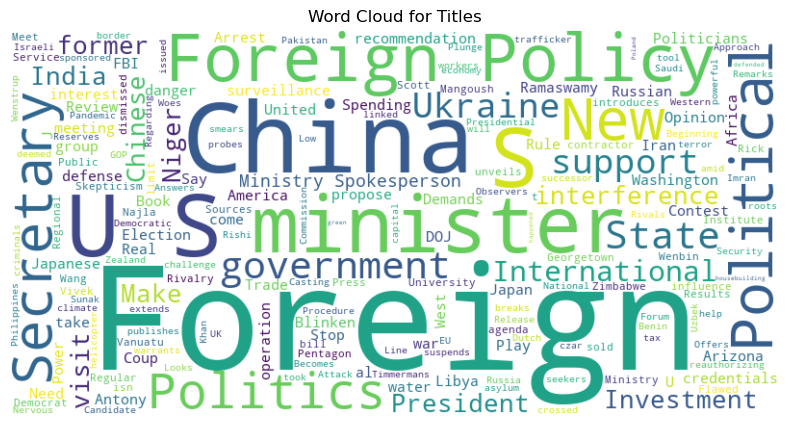

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud


# Create a word cloud for titles
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(dataG['Title']))

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Titles')
plt.axis('off')
plt.show()


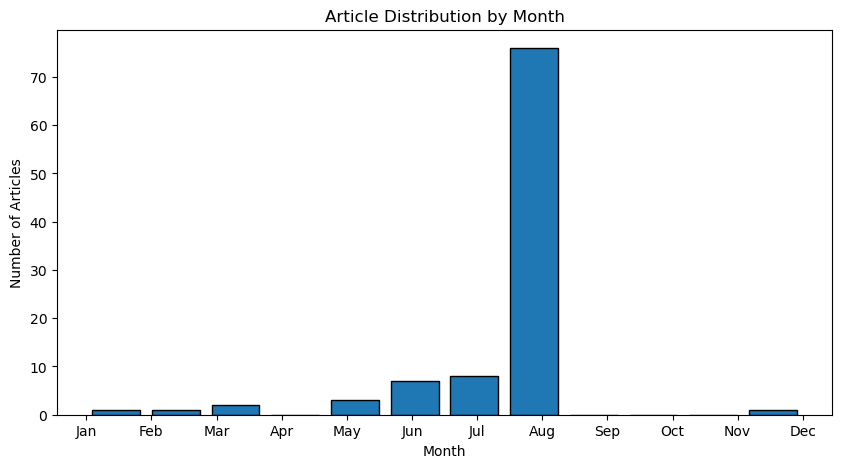

In [29]:
import pandas as pd
import matplotlib.pyplot as plt


# Convert the "Date" column to a datetime object if it's not already
dataG['Date'] = pd.to_datetime(dataG['Date'])

# Extract the month from the "Date" column and create a new column
dataG['Month'] = dataG['Date'].dt.month

# Create a histogram for the months
plt.figure(figsize=(10, 5))
plt.hist(data['Month'], bins=12, edgecolor='k', rwidth=0.8)
plt.xlabel('Month')
plt.ylabel('Number of Articles')
plt.title('Article Distribution by Month')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()


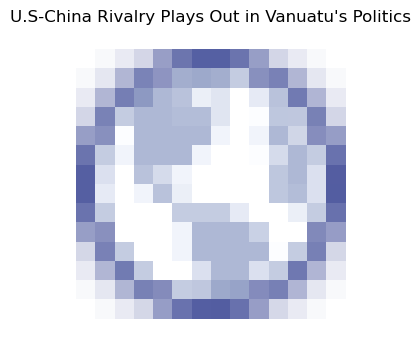

Link: https://news.google.com/articles/CBMiU2h0dHBzOi8vZm9yZWlnbnBvbGljeS5jb20vMjAyMy8wOC8yOC92YW51YXR1LXVzLWNoaW5hLWNvbXBldGl0aW9uLXBhY2lmaWMtc2VjdXJpdHkv0gEA?hl=en-US&gl=US&ceid=US%3Aen


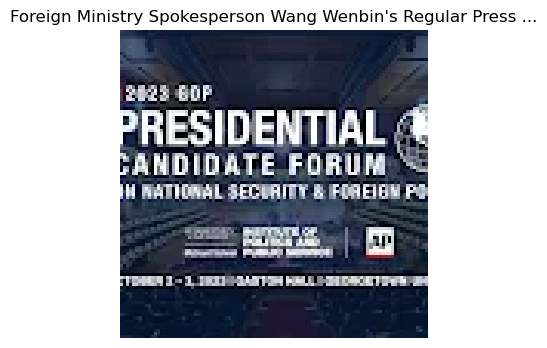

Link: https://news.google.com/articles/CBMiVGh0dHBzOi8vd3d3LmZtcHJjLmdvdi5jbi9lbmcveHdmd182NjUzOTkvczI1MTBfNjY1NDAxLzIwMjMwOC90MjAyMzA4MjlfMTExMzQ4ODYuaHRtbNIBAA?hl=en-US&gl=US&ceid=US%3Aen


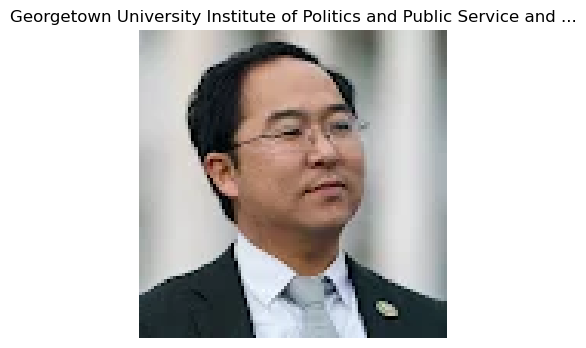

Link: https://news.google.com/articles/CBMipwFodHRwczovL3d3dy5hcC5vcmcvcHJlc3MtcmVsZWFzZXMvMjAyMy9nZW9yZ2V0b3duLXVuaXZlcnNpdHktaW5zdGl0dXRlLW9mLXBvbGl0aWNzLWFuZC1wdWJsaWMtc2VydmljZS1hbmQtdGhlLWFzc29jaWF0ZWQtcHJlc3MtdG8taG9zdC1uYXRpb25hbC1zZWN1cml0eS1hbmQtZm9yZWlnbi1wb9IBAA?hl=en-US&gl=US&ceid=US%3Aen


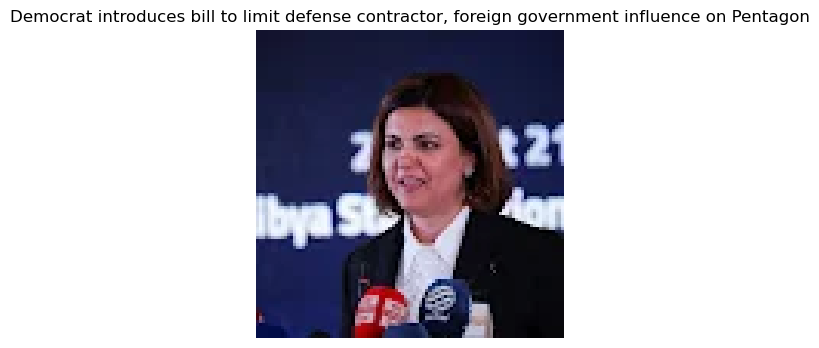

Link: https://news.google.com/articles/CBMiiQFodHRwczovL3RoZWhpbGwuY29tL3BvbGljeS9kZWZlbnNlLzQxNzY4MTktZGVtb2NyYXQtaW50cm9kdWNlcy1iaWxsLXRvLWxpbWl0LWRlZmVuc2UtY29udHJhY3Rvci1mb3JlaWduLWdvdmVybm1lbnQtaW5mbHVlbmNlLW9uLXBlbnRhZ29uL9IBjQFodHRwczovL3RoZWhpbGwuY29tL3BvbGljeS9kZWZlbnNlLzQxNzY4MTktZGVtb2NyYXQtaW50cm9kdWNlcy1iaWxsLXRvLWxpbWl0LWRlZmVuc2UtY29udHJhY3Rvci1mb3JlaWduLWdvdmVybm1lbnQtaW5mbHVlbmNlLW9uLXBlbnRhZ29uL2FtcC8?hl=en-US&gl=US&ceid=US%3Aen


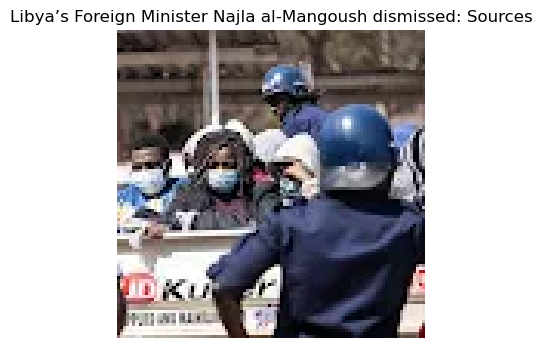

Link: https://news.google.com/articles/CBMic2h0dHBzOi8vd3d3LmFsamF6ZWVyYS5jb20vbmV3cy8yMDIzLzgvMjgvbGlieWEtcHJvdGVzdHMtYWZ0ZXItZm9yZWlnbi1taW5pc3Rlci1yZXBvcnRlZGx5LW1ldC13aXRoLWlzcmFlbGktb2ZmaWNpYWzSAXdodHRwczovL3d3dy5hbGphemVlcmEuY29tL2FtcC9uZXdzLzIwMjMvOC8yOC9saWJ5YS1wcm90ZXN0cy1hZnRlci1mb3JlaWduLW1pbmlzdGVyLXJlcG9ydGVkbHktbWV0LXdpdGgtaXNyYWVsaS1vZmZpY2lhbA?hl=en-US&gl=US&ceid=US%3Aen


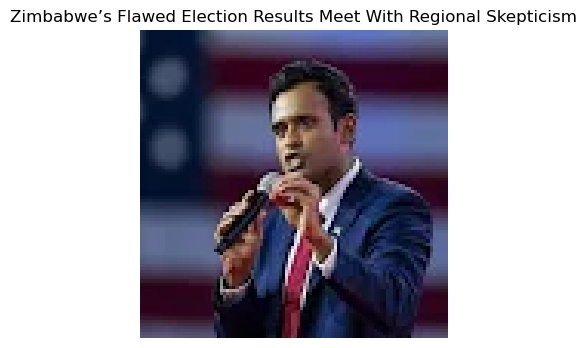

Link: https://news.google.com/articles/CBMiV2h0dHBzOi8vd3d3LmNmci5vcmcvaW4tYnJpZWYvemltYmFid2VzLWZsYXdlZC1lbGVjdGlvbi1yZXN1bHRzLW1lZXQtcmVnaW9uYWwtc2tlcHRpY2lzbdIBW2h0dHBzOi8vd3d3LmNmci5vcmcvaW4tYnJpZWYvemltYmFid2VzLWZsYXdlZC1lbGVjdGlvbi1yZXN1bHRzLW1lZXQtcmVnaW9uYWwtc2tlcHRpY2lzbT9hbXA?hl=en-US&gl=US&ceid=US%3Aen


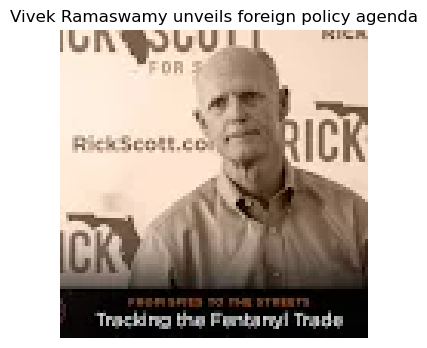

Link: https://news.google.com/articles/CBMiY2h0dHBzOi8vbnkxLmNvbS9ueWMvYWxsLWJvcm91Z2hzL3BvbGl0aWNzLzIwMjMvMDgvMjgvdml2ZWstcmFtYXN3YW15LXVudmVpbHMtZWNvbm9taWMtcG9saWN5LWFnZW5kYdIBAA?hl=en-US&gl=US&ceid=US%3Aen


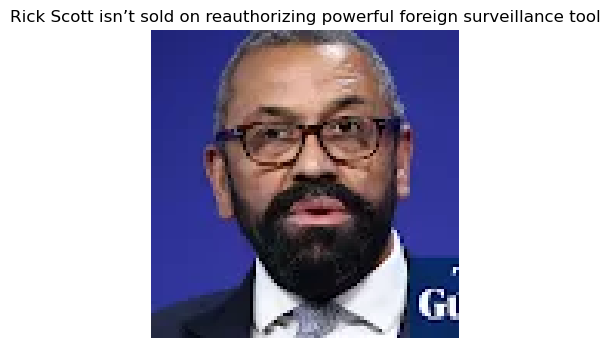

Link: https://news.google.com/articles/CBMiSmh0dHBzOi8vd3d3Lm1pYW1paGVyYWxkLmNvbS9uZXdzL3BvbGl0aWNzLWdvdmVybm1lbnQvYXJ0aWNsZTI3ODYxNDIzOS5odG1s0gFKaHR0cHM6Ly9hbXAubWlhbWloZXJhbGQuY29tL25ld3MvcG9saXRpY3MtZ292ZXJubWVudC9hcnRpY2xlMjc4NjE0MjM5Lmh0bWw?hl=en-US&gl=US&ceid=US%3Aen


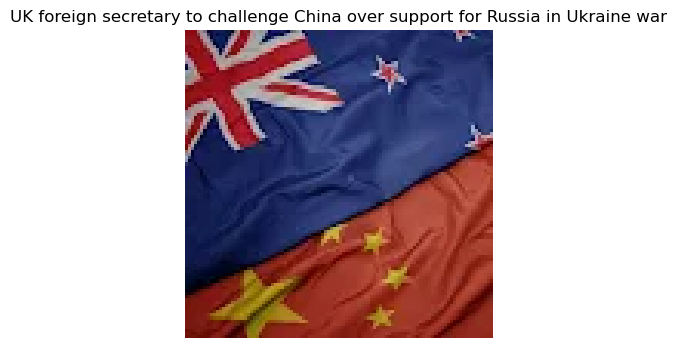

Link: https://news.google.com/articles/CBMifmh0dHBzOi8vd3d3LnRoZWd1YXJkaWFuLmNvbS9wb2xpdGljcy8yMDIzL2F1Zy8yOS91ay1mb3JlaWduLXNlY3JldGFyeS1qYW1lcy1jbGV2ZXJseS12aXNpdC1jaGluYS1zdGFiaWxpc2UtdHVyYnVsZW50LXJlbGF0aW9uc9IBfmh0dHBzOi8vYW1wLnRoZWd1YXJkaWFuLmNvbS9wb2xpdGljcy8yMDIzL2F1Zy8yOS91ay1mb3JlaWduLXNlY3JldGFyeS1qYW1lcy1jbGV2ZXJseS12aXNpdC1jaGluYS1zdGFiaWxpc2UtdHVyYnVsZW50LXJlbGF0aW9ucw?hl=en-US&gl=US&ceid=US%3Aen


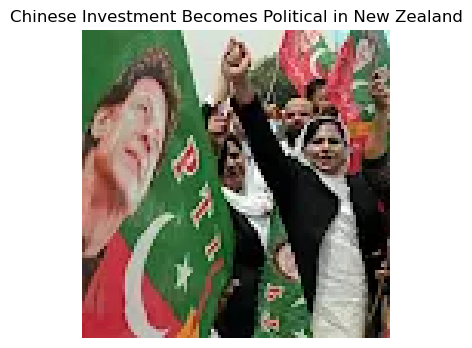

Link: https://news.google.com/articles/CBMiVGh0dHBzOi8vdGhlZGlwbG9tYXQuY29tLzIwMjMvMDgvY2hpbmVzZS1pbnZlc3RtZW50LWJlY29tZXMtcG9saXRpY2FsLWluLW5ldy16ZWFsYW5kL9IBAA?hl=en-US&gl=US&ceid=US%3Aen


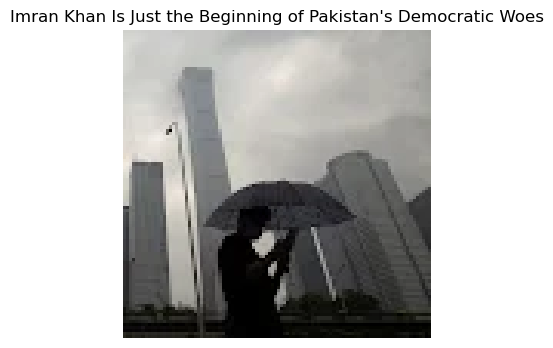

Link: https://news.google.com/articles/CBMic2h0dHBzOi8vZm9yZWlnbnBvbGljeS5jb20vMjAyMy8wOC8yOS9pbXJhbi1raGFuLWNvbnZpY3Rpb24tcGFraXN0YW4tZGVtb2NyYWN5LXBvbGl0aWNzLXNoYXJpZi1lbGVjdGlvbnMtb3Bwb3NpdGlvbi_SAQA?hl=en-US&gl=US&ceid=US%3Aen


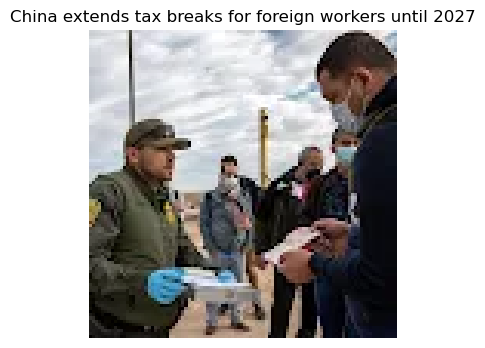

Link: https://news.google.com/articles/CBMiYGh0dHBzOi8vd3d3LnJldXRlcnMuY29tL2J1c2luZXNzL2NoaW5hLWV4dGVuZHMtdGF4LWJyZWFrcy1mb3JlaWduLXdvcmtlcnMtdW50aWwtMjAyNy0yMDIzLTA4LTI5L9IBAA?hl=en-US&gl=US&ceid=US%3Aen


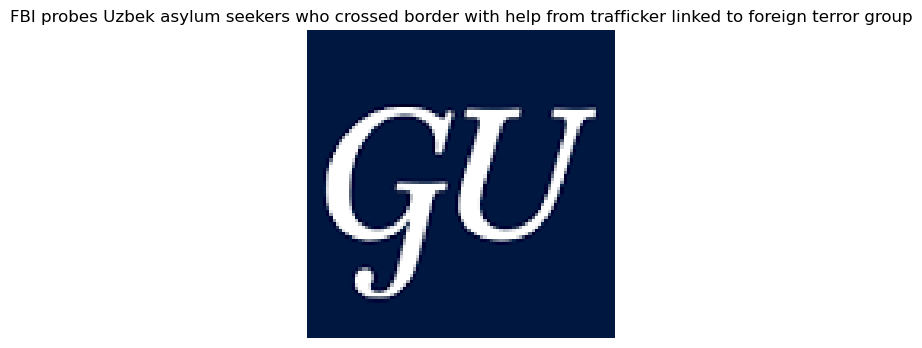

Link: https://news.google.com/articles/CBMie2h0dHBzOi8vd3d3LmZveG5ld3MuY29tL3BvbGl0aWNzL2ZiaS1wcm9iZXMtdXpiZWstYXN5bHVtLXNlZWtlcnMtY3Jvc3NlZC1ib3JkZXItaGVscC10cmFmZmlja2VyLWxpbmtlZC1mb3JlaWduLXRlcnJvci1ncm91cNIBf2h0dHBzOi8vd3d3LmZveG5ld3MuY29tL3BvbGl0aWNzL2ZiaS1wcm9iZXMtdXpiZWstYXN5bHVtLXNlZWtlcnMtY3Jvc3NlZC1ib3JkZXItaGVscC10cmFmZmlja2VyLWxpbmtlZC1mb3JlaWduLXRlcnJvci1ncm91cC5hbXA?hl=en-US&gl=US&ceid=US%3Aen


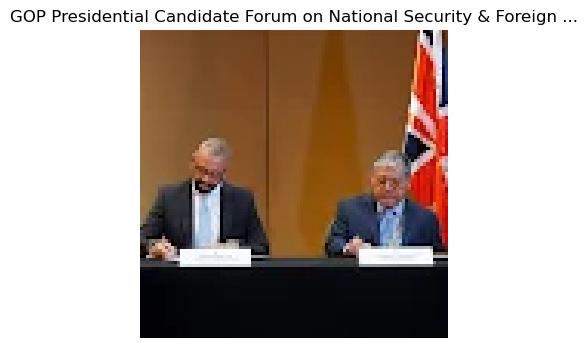

Link: https://news.google.com/articles/CBMiR2h0dHBzOi8vcG9saXRpY3MuZ2VvcmdldG93bi5lZHUvZm9ydW0vZ29wLXByZXNpZGVudGlhbC1jYW5kaWRhdGUtZm9ydW0v0gEA?hl=en-US&gl=US&ceid=US%3Aen


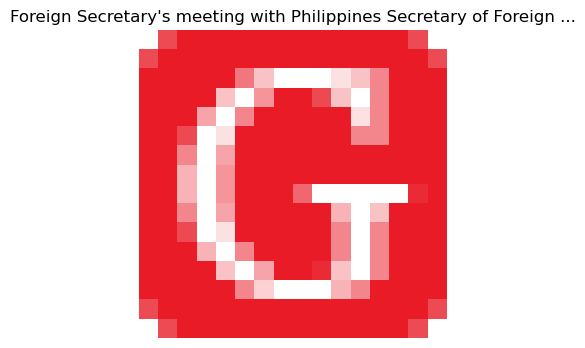

Link: https://news.google.com/articles/CBMifmh0dHBzOi8vd3d3Lmdvdi51ay9nb3Zlcm5tZW50L25ld3MvZm9yZWlnbi1zZWNyZXRhcnlzLW1lZXRpbmctd2l0aC1waGlsaXBwaW5lcy1zZWNyZXRhcnktb2YtZm9yZWlnbi1hZmZhaXJzLW1hbmFsby1hdWd1c3QtMjAyM9IBAA?hl=en-US&gl=US&ceid=US%3Aen


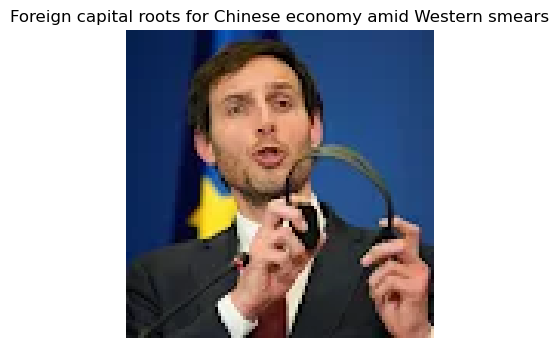

Link: https://news.google.com/articles/CBMiNGh0dHBzOi8vd3d3Lmdsb2JhbHRpbWVzLmNuL3BhZ2UvMjAyMzA4LzEyOTcxOTguc2h0bWzSAQA?hl=en-US&gl=US&ceid=US%3Aen


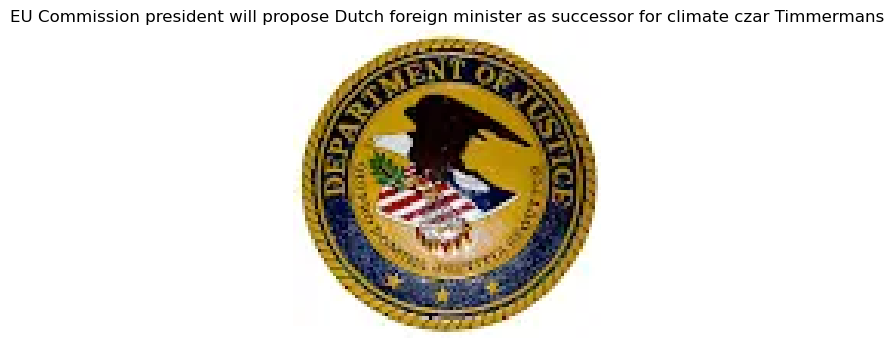

Link: https://news.google.com/articles/CBMieWh0dHBzOi8vYWJjbmV3cy5nby5jb20vSW50ZXJuYXRpb25hbC93aXJlU3RvcnkvZXUtY29tbWlzc2lvbi1wcmVzaWRlbnQtcHJvcG9zZS1kdXRjaC1mb3JlaWduLW1pbmlzdGVyLXN1Y2Nlc3Nvci0xMDI2NTI1MTjSAX1odHRwczovL2FiY25ld3MuZ28uY29tL2FtcC9JbnRlcm5hdGlvbmFsL3dpcmVTdG9yeS9ldS1jb21taXNzaW9uLXByZXNpZGVudC1wcm9wb3NlLWR1dGNoLWZvcmVpZ24tbWluaXN0ZXItc3VjY2Vzc29yLTEwMjY1MjUxOA?hl=en-US&gl=US&ceid=US%3Aen


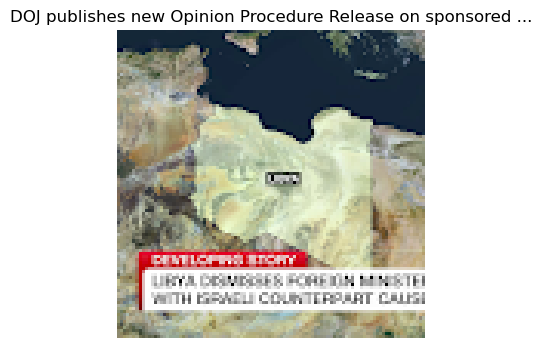

Link: https://news.google.com/articles/CBMidmh0dHBzOi8vZmNwYWJsb2cuY29tLzIwMjMvMDgvMjkvZG9qLXB1Ymxpc2hlcy1uZXctb3Bpbmlvbi1wcm9jZWR1cmUtcmVsZWFzZS1vbi1zcG9uc29yZWQtdHJhdmVsLWZvci1mb3JlaWduLW9mZmljaWFscy_SAQA?hl=en-US&gl=US&ceid=US%3Aen


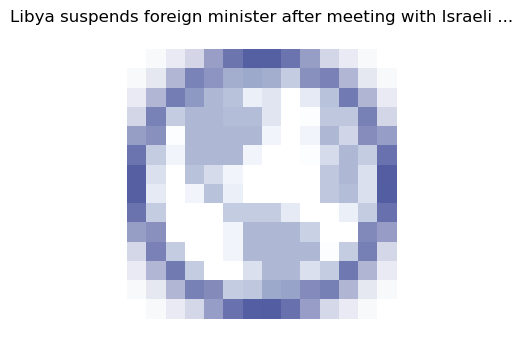

Link: https://news.google.com/articles/CBMie2h0dHBzOi8vd3d3LmNubi5jb20vdmlkZW9zL3dvcmxkLzIwMjMvMDgvMjkvZXhwLWlzcmFlbC1saWJ5YS1mb3JlaWduLW1pbmlzdGVyLWRpc21pc3NlZC1nb2xkLWxvay0wODI5MDNhc2VnMS1jbm5pLXdvcmxkLmNubtIBf2h0dHBzOi8vYW1wLmNubi5jb20vY25uL3ZpZGVvcy93b3JsZC8yMDIzLzA4LzI5L2V4cC1pc3JhZWwtbGlieWEtZm9yZWlnbi1taW5pc3Rlci1kaXNtaXNzZWQtZ29sZC1sb2stMDgyOTAzYXNlZzEtY25uaS13b3JsZC5jbm4?hl=en-US&gl=US&ceid=US%3Aen


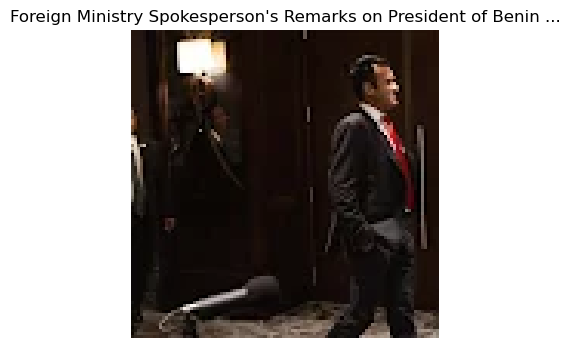

Link: https://news.google.com/articles/CBMiVGh0dHBzOi8vd3d3LmZtcHJjLmdvdi5jbi9lbmcveHdmd182NjUzOTkvczI1MTBfNjY1NDAxLzIwMjMwOC90MjAyMzA4MjlfMTExMzQ4MjQuaHRtbNIBAA?hl=en-US&gl=US&ceid=US%3Aen


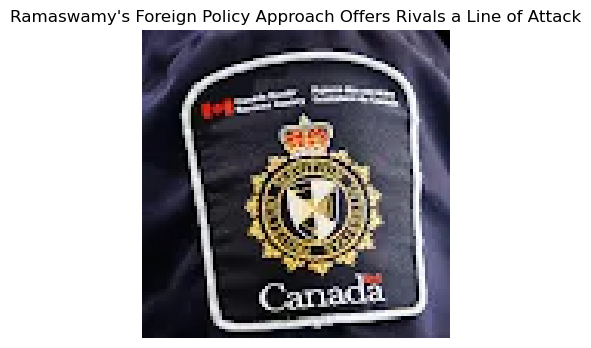

Link: https://news.google.com/articles/CBMiUmh0dHBzOi8vd3d3Lm55dGltZXMuY29tLzIwMjMvMDgvMjEvdXMvcG9saXRpY3Mvdml2ZWstcmFtYXN3YW15LWZvcmVpZ24tcG9saWN5Lmh0bWzSAQA?hl=en-US&gl=US&ceid=US%3Aen


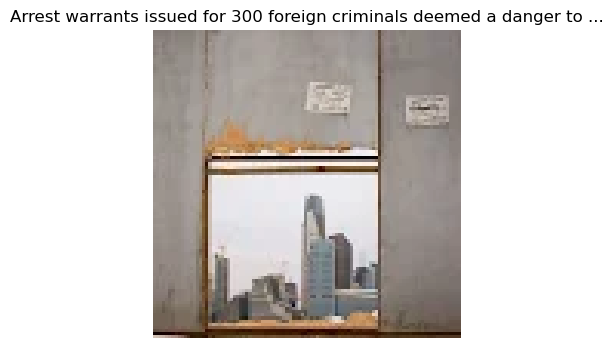

Link: https://news.google.com/articles/CBMidWh0dHBzOi8vd3d3LnRoZWdsb2JlYW5kbWFpbC5jb20vcG9saXRpY3MvYXJ0aWNsZS1hcnJlc3Qtd2FycmFudHMtaXNzdWVkLWZvci0zMDAtZm9yZWlnbi1jcmltaW5hbHMtZGVlbWVkLWEtZGFuZ2VyLXRvL9IBeWh0dHBzOi8vd3d3LnRoZWdsb2JlYW5kbWFpbC5jb20vYW1wL3BvbGl0aWNzL2FydGljbGUtYXJyZXN0LXdhcnJhbnRzLWlzc3VlZC1mb3ItMzAwLWZvcmVpZ24tY3JpbWluYWxzLWRlZW1lZC1hLWRhbmdlci10by8?hl=en-US&gl=US&ceid=US%3Aen


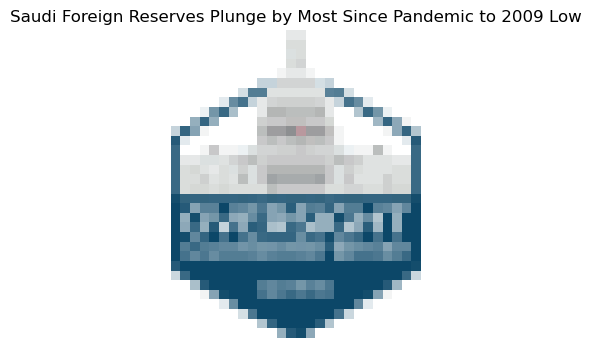

Link: https://news.google.com/articles/CBMic2h0dHBzOi8vd3d3LmJsb29tYmVyZy5jb20vbmV3cy9hcnRpY2xlcy8yMDIzLTA4LTI5L3NhdWRpLWZvcmVpZ24tcmVzZXJ2ZXMtcGx1bmdlLWJ5LW1vc3Qtc2luY2UtcGFuZGVtaWMtdG8tMjAwOS1sb3fSAQA?hl=en-US&gl=US&ceid=US%3Aen


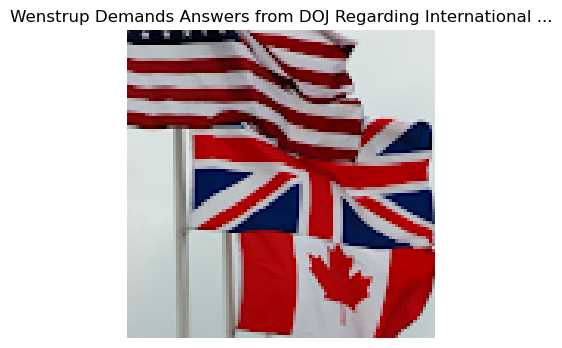

Link: https://news.google.com/articles/CBMidGh0dHBzOi8vb3ZlcnNpZ2h0LmhvdXNlLmdvdi9yZWxlYXNlL3dlbnN0cnVwLWRlbWFuZHMtYW5zd2Vycy1mcm9tLWRvai1yZWdhcmRpbmctaW50ZXJuYXRpb25hbC1jb3ZpZC0xOS1yZWxpZWYtZnJhdWQv0gEA?hl=en-US&gl=US&ceid=US%3Aen


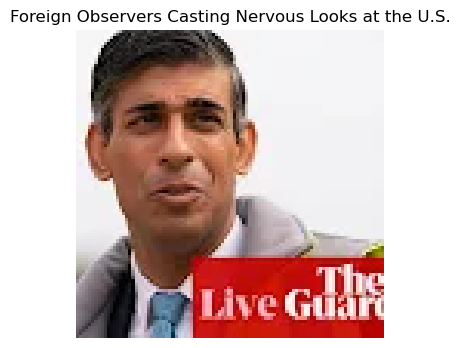

Link: https://news.google.com/articles/CBMibGh0dHBzOi8vd3d3LmNvb2twb2xpdGljYWwuY29tL2FuYWx5c2lzL25hdGlvbmFsL25hdGlvbmFsLXBvbGl0aWNzL2ZvcmVpZ24tb2JzZXJ2ZXJzLWNhc3RpbmctbmVydm91cy1sb29rcy11c9IBAA?hl=en-US&gl=US&ceid=US%3Aen


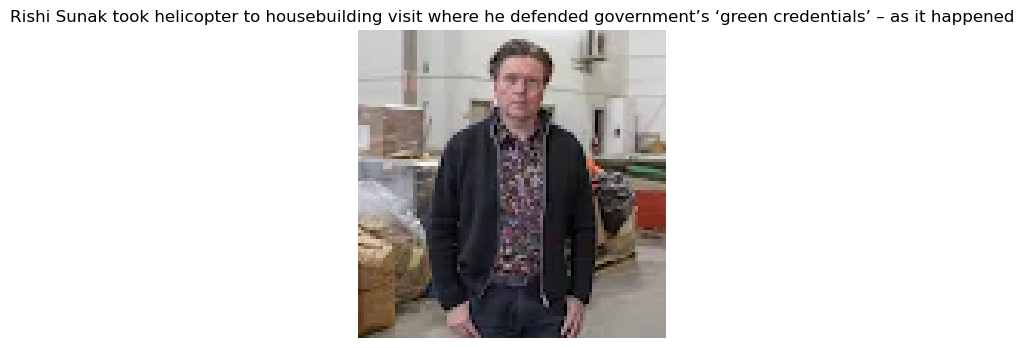

Link: https://news.google.com/articles/CBMijAFodHRwczovL3d3dy50aGVndWFyZGlhbi5jb20vcG9saXRpY3MvbGl2ZS8yMDIzL2F1Zy8yOS9taWNoYWVsLWdvdmUtd2F0ZXItcG9sbHV0aW9uLWhvdXNpbmctZGlzZ3JhY2VmdWwtbGliLWRlbXMtcmlzaGktc3VuYWstdWstcG9saXRpY3MtbGl2ZdIBjAFodHRwczovL2FtcC50aGVndWFyZGlhbi5jb20vcG9saXRpY3MvbGl2ZS8yMDIzL2F1Zy8yOS9taWNoYWVsLWdvdmUtd2F0ZXItcG9sbHV0aW9uLWhvdXNpbmctZGlzZ3JhY2VmdWwtbGliLWRlbXMtcmlzaGktc3VuYWstdWstcG9saXRpY3MtbGl2ZQ?hl=en-US&gl=US&ceid=US%3Aen


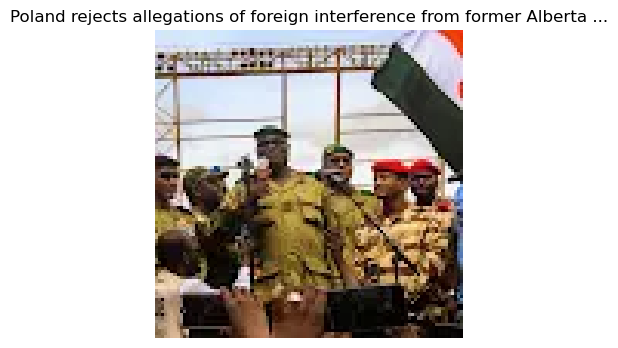

Link: https://news.google.com/articles/CBMieGh0dHBzOi8vd3d3LnRoZWdsb2JlYW5kbWFpbC5jb20vcG9saXRpY3MvYXJ0aWNsZS1wb2xhbmQtcmVqZWN0cy1hbGxlZ2F0aW9ucy1vZi1mb3JlaWduLWludGVyZmVyZW5jZS1mcm9tLWZvcm1lci1hbGJlcnRhL9IBfGh0dHBzOi8vd3d3LnRoZWdsb2JlYW5kbWFpbC5jb20vYW1wL3BvbGl0aWNzL2FydGljbGUtcG9sYW5kLXJlamVjdHMtYWxsZWdhdGlvbnMtb2YtZm9yZWlnbi1pbnRlcmZlcmVuY2UtZnJvbS1mb3JtZXItYWxiZXJ0YS8?hl=en-US&gl=US&ceid=US%3Aen


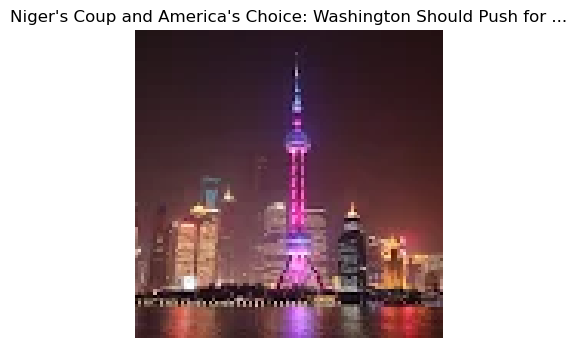

Link: https://news.google.com/articles/CBMiSmh0dHBzOi8vd3d3LmZvcmVpZ25hZmZhaXJzLmNvbS93ZXN0LWFmcmljYS9uaWdlcnMtY291cC1hbmQtYW1lcmljYXMtY2hvaWNl0gEA?hl=en-US&gl=US&ceid=US%3Aen


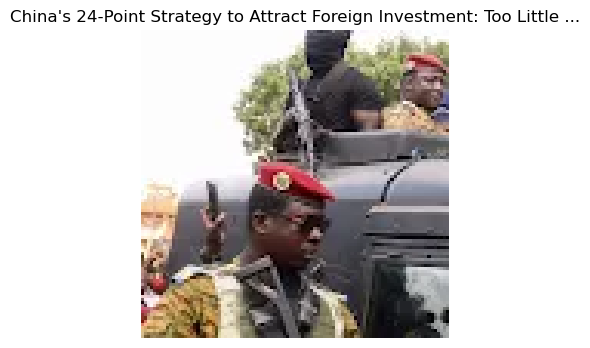

Link: https://news.google.com/articles/CBMia2h0dHBzOi8vdGhlZGlwbG9tYXQuY29tLzIwMjMvMDgvY2hpbmFzLTI0LXBvaW50LXN0cmF0ZWd5LXRvLWF0dHJhY3QtZm9yZWlnbi1pbnZlc3RtZW50LXRvby1saXR0bGUtdG9vLWxhdGUv0gEA?hl=en-US&gl=US&ceid=US%3Aen


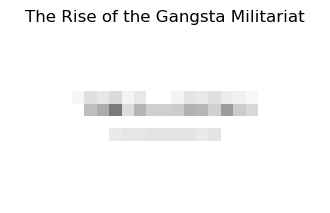

Link: https://news.google.com/articles/CBMiMGh0dHBzOi8vd3d3LmNmci5vcmcvYmxvZy9yaXNlLWdhbmdzdGEtbWlsaXRhcmlhdNIBNGh0dHBzOi8vd3d3LmNmci5vcmcvYmxvZy9yaXNlLWdhbmdzdGEtbWlsaXRhcmlhdD9hbXA?hl=en-US&gl=US&ceid=US%3Aen


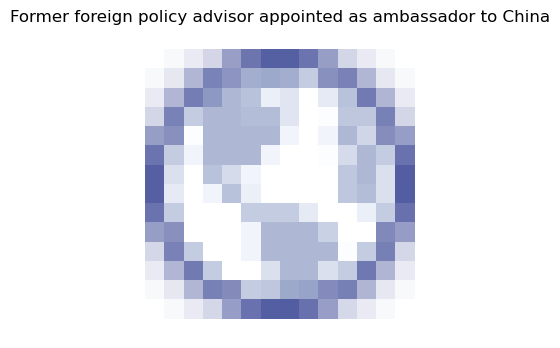

Link: https://news.google.com/articles/CBMiaWh0dHBzOi8vd3d3LnRoZWZpcnN0bmV3cy5jb20vYXJ0aWNsZS9mb3JtZXItZm9yZWlnbi1wb2xpY3ktYWR2aXNvci1hcHBvaW50ZWQtYXMtYW1iYXNzYWRvci10by1jaGluYS00MDg3MtIBAA?hl=en-US&gl=US&ceid=US%3Aen


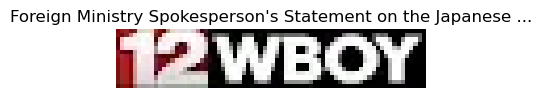

Link: https://news.google.com/articles/CBMiYGh0dHBzOi8vd3d3LmZtcHJjLmdvdi5jbi9lbmcveHdmd182NjUzOTkvczI1MTBfNjY1NDAxLzI1MzVfNjY1NDA1LzIwMjMwOC90MjAyMzA4MjRfMTExMzEzMjUuaHRtbNIBAA?hl=en-US&gl=US&ceid=US%3Aen


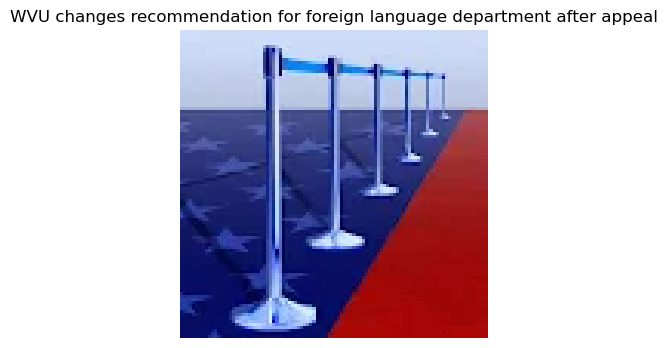

Link: https://news.google.com/articles/CBMihgFodHRwczovL3d3dy53Ym95LmNvbS9uZXdzL21vbm9uZ2FsaWEvd2VzdC12aXJnaW5pYS11bml2ZXJzaXR5L3d2dS1jaGFuZ2VzLXJlY29tbWVuZGF0aW9uLWZvci1mb3JlaWduLWxhbmd1YWdlLWRlcGFydG1lbnQtYWZ0ZXItYXBwZWFsL9IBigFodHRwczovL3d3dy53Ym95LmNvbS9uZXdzL21vbm9uZ2FsaWEvd2VzdC12aXJnaW5pYS11bml2ZXJzaXR5L3d2dS1jaGFuZ2VzLXJlY29tbWVuZGF0aW9uLWZvci1mb3JlaWduLWxhbmd1YWdlLWRlcGFydG1lbnQtYWZ0ZXItYXBwZWFsL2FtcC8?hl=en-US&gl=US&ceid=US%3Aen


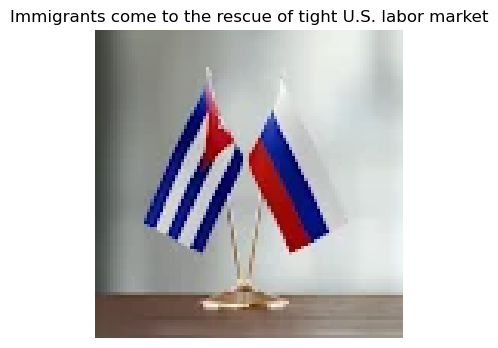

Link: https://news.google.com/articles/CBMiPWh0dHBzOi8vd3d3LmF4aW9zLmNvbS8yMDIzLzA4LzI5L3VzLWVjb25vbXktaW1taWdyYXRpb24tbGFib3LSAQA?hl=en-US&gl=US&ceid=US%3Aen


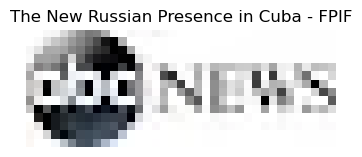

Link: https://news.google.com/articles/CBMiMmh0dHBzOi8vZnBpZi5vcmcvdGhlLW5ldy1ydXNzaWFuLXByZXNlbmNlLWluLWN1YmEv0gEA?hl=en-US&gl=US&ceid=US%3Aen


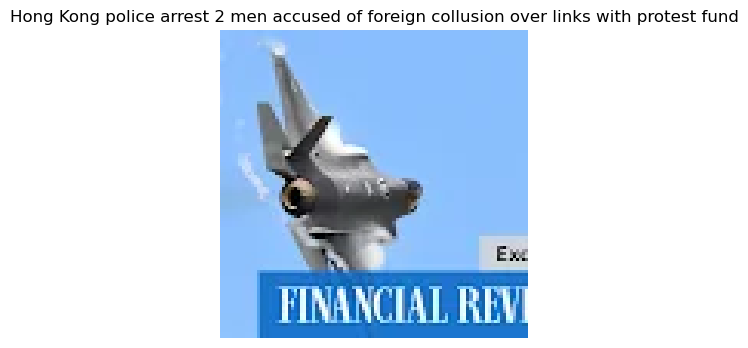

Link: https://news.google.com/articles/CBMiZmh0dHBzOi8vYWJjbmV3cy5nby5jb20vSW50ZXJuYXRpb25hbC93aXJlU3RvcnkvaG9uZy1rb25nLXBvbGljZS1hcnJlc3QtMi1tZW4tYWNjdXNlZC1mb3JlaWduLTEwMjYzOTE1MtIBamh0dHBzOi8vYWJjbmV3cy5nby5jb20vYW1wL0ludGVybmF0aW9uYWwvd2lyZVN0b3J5L2hvbmcta29uZy1wb2xpY2UtYXJyZXN0LTItbWVuLWFjY3VzZWQtZm9yZWlnbi0xMDI2MzkxNTI?hl=en-US&gl=US&ceid=US%3Aen


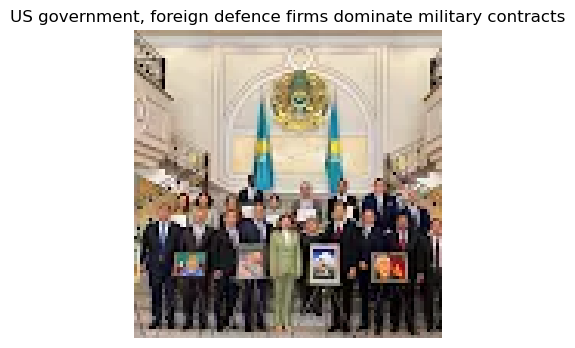

Link: https://news.google.com/articles/CBMidGh0dHBzOi8vd3d3LmFmci5jb20vcG9saXRpY3MvZmVkZXJhbC9mb3JlaWduLWRlZmVuY2UtY29udHJhY3RvcnMtZW5qb3ktcGF5ZGF5LWF0LWF1c3RyYWxpYS1zLWV4cGVuc2UtMjAyMzA4MjktcDVlMDln0gEA?hl=en-US&gl=US&ceid=US%3Aen


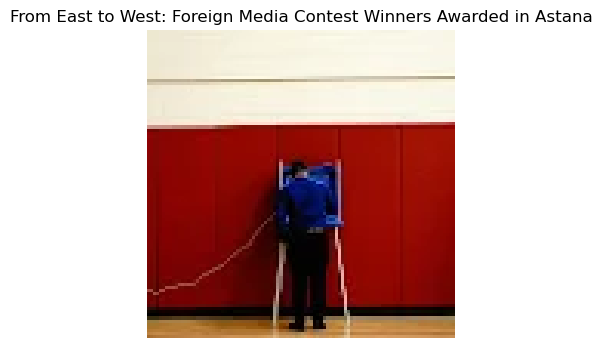

Link: https://news.google.com/articles/CBMiYmh0dHBzOi8vYXN0YW5hdGltZXMuY29tLzIwMjMvMDgvZnJvbS1lYXN0LXRvLXdlc3QtZm9yZWlnbi1tZWRpYS1jb250ZXN0LXdpbm5lcnMtYXdhcmRlZC1pbi1hc3RhbmEv0gEA?hl=en-US&gl=US&ceid=US%3Aen


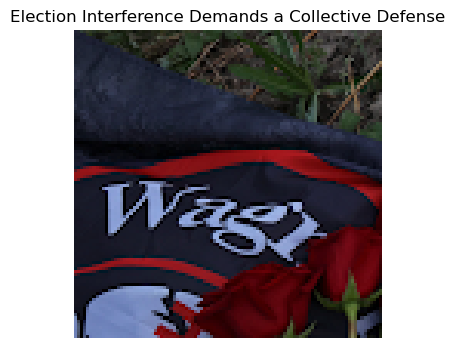

Link: https://news.google.com/articles/CBMiXWh0dHBzOi8vd3d3LmZvcmVpZ25hZmZhaXJzLmNvbS91bml0ZWQtc3RhdGVzL2VsZWN0aW9uLWludGVyZmVyZW5jZS1kZW1hbmRzLWNvbGxlY3RpdmUtZGVmZW5zZdIBAA?hl=en-US&gl=US&ceid=US%3Aen


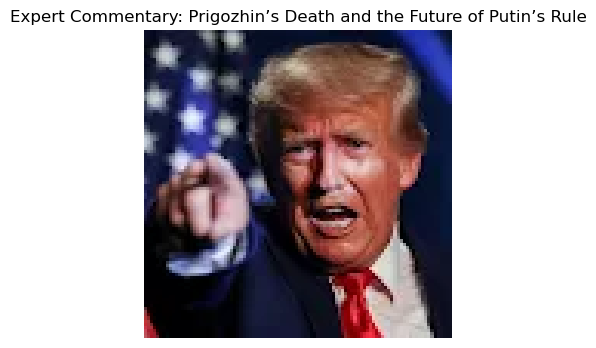

Link: https://news.google.com/articles/CBMia2h0dHBzOi8vd3d3LmZwcmkub3JnL2FydGljbGUvMjAyMy8wOC9mcHJpLWV4cGVydC1jb21tZW50YXJ5LXByaWdvemhpbnMtZGVhdGgtYW5kLXRoZS1mdXR1cmUtb2YtcHV0aW5zLXJ1bGUv0gEA?hl=en-US&gl=US&ceid=US%3Aen


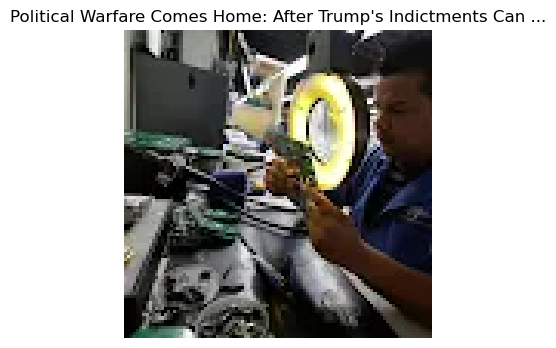

Link: https://news.google.com/articles/CBMiW2h0dHBzOi8vd3d3LmZvcmVpZ25hZmZhaXJzLmNvbS91bml0ZWQtc3RhdGVzL3RydW1wLWluZGljdG1lbnRzLXBvbGl0aWNhbC13YXJmYXJlLWNvbWVzLWhvbWXSAQA?hl=en-US&gl=US&ceid=US%3Aen


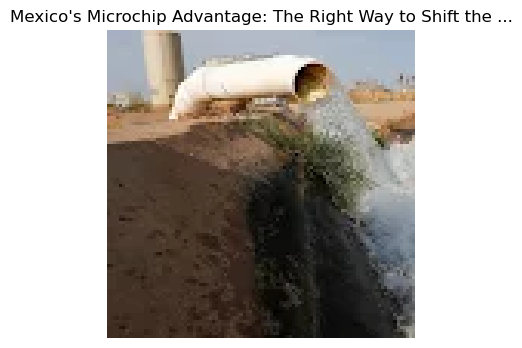

Link: https://news.google.com/articles/CBMiVWh0dHBzOi8vd3d3LmZvcmVpZ25hZmZhaXJzLmNvbS9tZXhpY28vbWV4aWNvcy1taWNyb2NoaXAtYWR2YW50YWdlLXNlbWljb25kdWN0b3ItY2hpbmHSAQA?hl=en-US&gl=US&ceid=US%3Aen


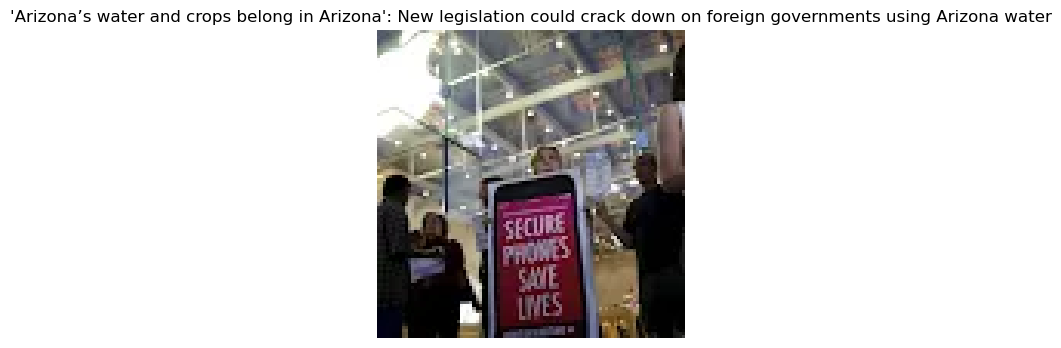

Link: https://news.google.com/articles/CBMivAFodHRwczovL3d3dy4xMm5ld3MuY29tL2FydGljbGUvbmV3cy9sb2NhbC93YXRlci13YXJzL3JlcC1ydWJlbi1nYWxsZWdvLWludHJvZHVjZXMtZG9tZXN0aWMtd2F0ZXItcHJvdGVjdGlvbi1hY3QtMjAyMy1saW1pdC1mb3JlaWduLXdhdGVyLXVzZS1hcml6b25hLzc1LTE5NmI1NjI2LTc2YzktNGRlMS1iNDc2LWQ4MThkNzQ5MmQ5M9IBwAFodHRwczovL3d3dy4xMm5ld3MuY29tL2FtcC9hcnRpY2xlL25ld3MvbG9jYWwvd2F0ZXItd2Fycy9yZXAtcnViZW4tZ2FsbGVnby1pbnRyb2R1Y2VzLWRvbWVzdGljLXdhdGVyLXByb3RlY3Rpb24tYWN0LTIwMjMtbGltaXQtZm9yZWlnbi13YXRlci11c2UtYXJpem9uYS83NS0xOTZiNTYyNi03NmM5LTRkZTEtYjQ3Ni1kODE4ZDc0OTJkOTM?hl=en-US&gl=US&ceid=US%3Aen


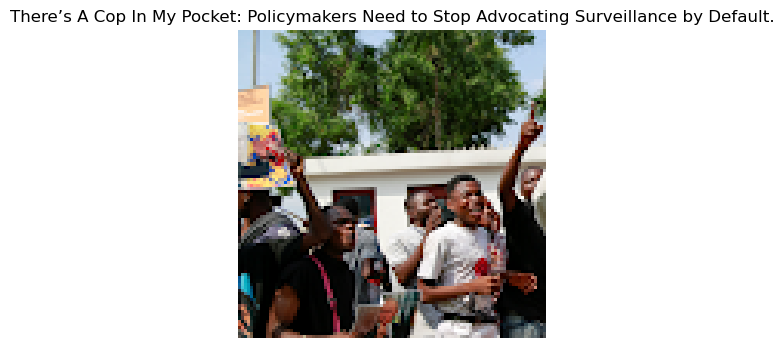

Link: https://news.google.com/articles/CBMiZGh0dHBzOi8vd3d3LmNmci5vcmcvYmxvZy90aGVyZXMtY29wLW15LXBvY2tldC1wb2xpY3ltYWtlcnMtbmVlZC1zdG9wLWFkdm9jYXRpbmctc3VydmVpbGxhbmNlLWRlZmF1bHTSAWhodHRwczovL3d3dy5jZnIub3JnL2Jsb2cvdGhlcmVzLWNvcC1teS1wb2NrZXQtcG9saWN5bWFrZXJzLW5lZWQtc3RvcC1hZHZvY2F0aW5nLXN1cnZlaWxsYW5jZS1kZWZhdWx0P2FtcA?hl=en-US&gl=US&ceid=US%3Aen


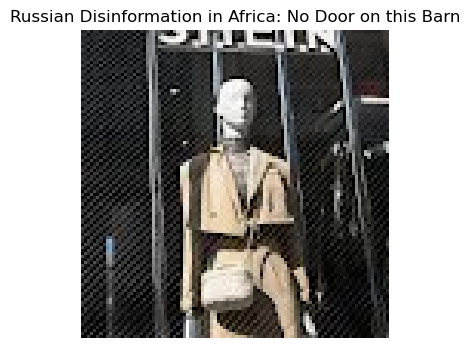

Link: https://news.google.com/articles/CBMiW2h0dHBzOi8vd3d3LmZwcmkub3JnL2FydGljbGUvMjAyMy8wOC9ydXNzaWFuLWRpc2luZm9ybWF0aW9uLWluLWFmcmljYS1uby1kb29yLW9uLXRoaXMtYmFybi_SAQA?hl=en-US&gl=US&ceid=US%3Aen


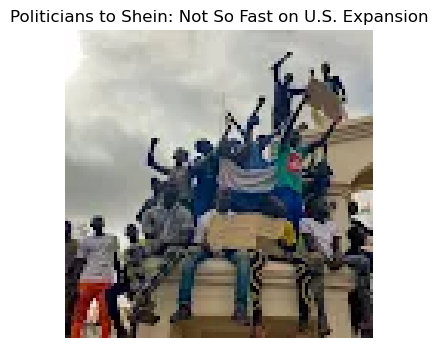

Link: https://news.google.com/articles/CBMiUWh0dHBzOi8vd3d3Lm55dGltZXMuY29tLzIwMjMvMDgvMjkvYnVzaW5lc3MvcG9saXRpY2lhbnMtc2VjLXNoZWluLWxldHRlci1pcG8uaHRtbNIBAA?hl=en-US&gl=US&ceid=US%3Aen


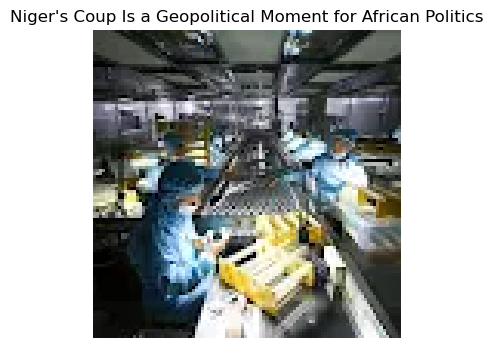

Link: https://news.google.com/articles/CBMieWh0dHBzOi8vZm9yZWlnbnBvbGljeS5jb20vMjAyMy8wOC8wOC9uaWdlci1jb3VwLWVjb3dhcy1uaWdlcmlhLXRpbnVidS1yZWdpb25hbC1jb29wZXJhdGlvbi1tdWx0aWxhdGVyYWxpc20tc3RhdGVidWlsZGluZy_SAQA?hl=en-US&gl=US&ceid=US%3Aen


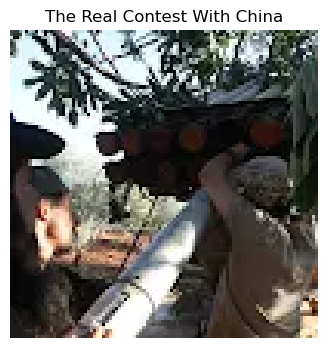

Link: https://news.google.com/articles/CBMiTWh0dHBzOi8vd3d3LmZvcmVpZ25hZmZhaXJzLmNvbS9jaGluYS9yZWFsLWNvbnRlc3QtYmVpamluZy1pbmR1c3RyaWFsLXN0cmF0ZWd50gEA?hl=en-US&gl=US&ceid=US%3Aen


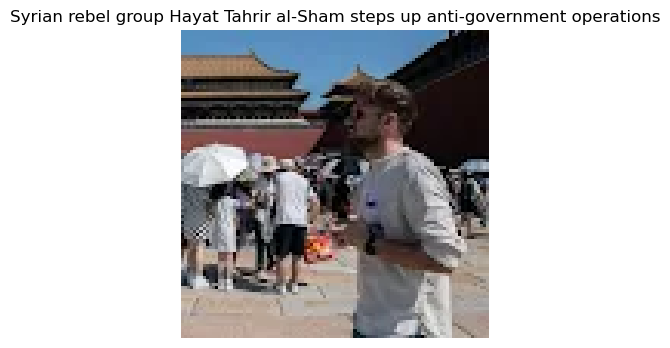

Link: https://news.google.com/articles/CBMidGh0dHBzOi8vd3d3LmFsamF6ZWVyYS5jb20vbmV3cy8yMDIzLzgvMjkvc3lyaWFuLXJlYmVsLWdyb3VwLWhheWF0LXRhaHJpci1hbC1zaGFtLXN0ZXBzLXVwLWFudGktZ292ZXJubWVudC1vcGVyYXRpb25z0gF4aHR0cHM6Ly93d3cuYWxqYXplZXJhLmNvbS9hbXAvbmV3cy8yMDIzLzgvMjkvc3lyaWFuLXJlYmVsLWdyb3VwLWhheWF0LXRhaHJpci1hbC1zaGFtLXN0ZXBzLXVwLWFudGktZ292ZXJubWVudC1vcGVyYXRpb25z?hl=en-US&gl=US&ceid=US%3Aen


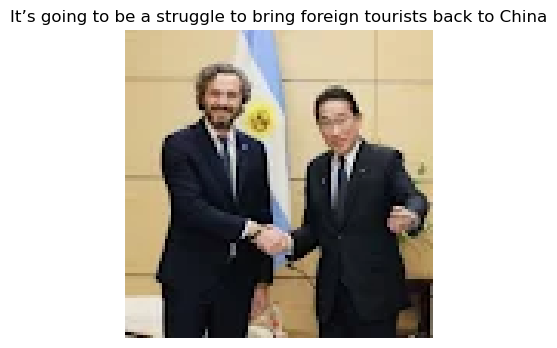

Link: https://news.google.com/articles/CBMicWh0dHBzOi8vd3d3LnNjbXAuY29tL25ld3MvY2hpbmEvZGlwbG9tYWN5L2FydGljbGUvMzIzMjczMC9pdHMtZ29pbmctYmUtc3RydWdnbGUtYnJpbmctZm9yZWlnbi10b3VyaXN0cy1iYWNrLWNoaW5h0gFxaHR0cHM6Ly9hbXAuc2NtcC5jb20vbmV3cy9jaGluYS9kaXBsb21hY3kvYXJ0aWNsZS8zMjMyNzMwL2l0cy1nb2luZy1iZS1zdHJ1Z2dsZS1icmluZy1mb3JlaWduLXRvdXJpc3RzLWJhY2stY2hpbmE?hl=en-US&gl=US&ceid=US%3Aen


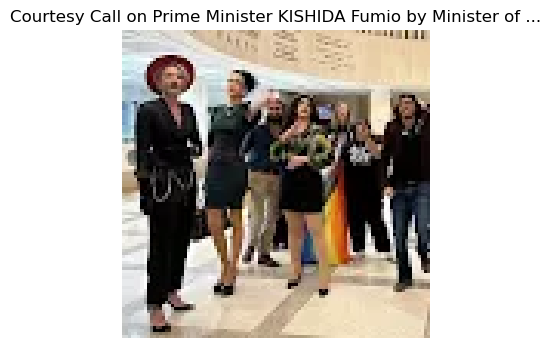

Link: https://news.google.com/articles/CBMiNGh0dHBzOi8vd3d3Lm1vZmEuZ28uanAvbGFfYy9zYS9hci9wYWdlNWVfMDAwMDY0Lmh0bWzSAQA?hl=en-US&gl=US&ceid=US%3Aen


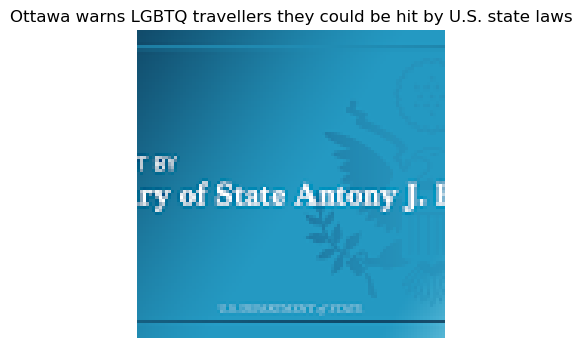

Link: https://news.google.com/articles/CBMiU2h0dHBzOi8vd3d3LmNiYy5jYS9uZXdzL3BvbGl0aWNzL2dsb2JhbC1hZmZhaXJzLWxnYnQtdW5pdGVkc3RhdGVzLXdhcm5pbmctMS42OTUwODMz0gEgaHR0cHM6Ly93d3cuY2JjLmNhL2FtcC8xLjY5NTA4MzM?hl=en-US&gl=US&ceid=US%3Aen


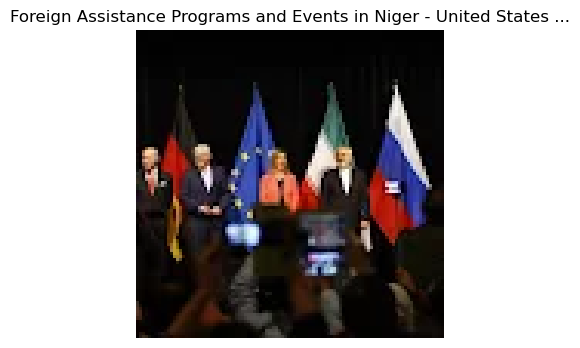

Link: https://news.google.com/articles/CBMiRmh0dHBzOi8vd3d3LnN0YXRlLmdvdi9mb3JlaWduLWFzc2lzdGFuY2UtcHJvZ3JhbXMtYW5kLWV2ZW50cy1pbi1uaWdlci_SAQA?hl=en-US&gl=US&ceid=US%3Aen


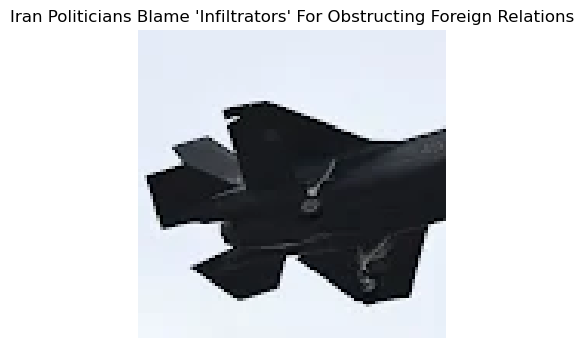

Link: https://news.google.com/articles/CBMiKGh0dHBzOi8vd3d3LmlyYW5pbnRsLmNvbS9lbi8yMDIzMDgyMjg2NTPSAQA?hl=en-US&gl=US&ceid=US%3Aen


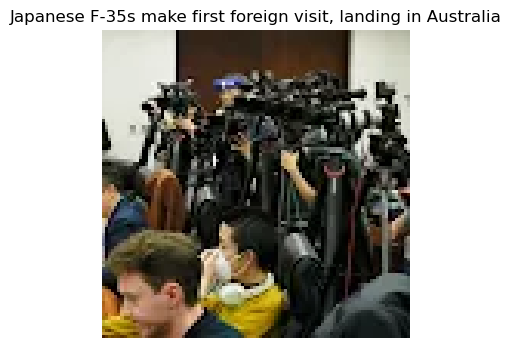

Link: https://news.google.com/articles/CBMiYWh0dHBzOi8vYnJlYWtpbmdkZWZlbnNlLmNvbS8yMDIzLzA4L2phcGFuZXNlLWYtMzVzLW1ha2UtZmlyc3QtZm9yZWlnbi12aXNpdC1sYW5kaW5nLWluLWF1c3RyYWxpYS_SAWdodHRwczovL2JyZWFraW5nZGVmZW5zZS5jb20vMjAyMy8wOC9qYXBhbmVzZS1mLTM1cy1tYWtlLWZpcnN0LWZvcmVpZ24tdmlzaXQtbGFuZGluZy1pbi1hdXN0cmFsaWEvP2FtcD0x?hl=en-US&gl=US&ceid=US%3Aen


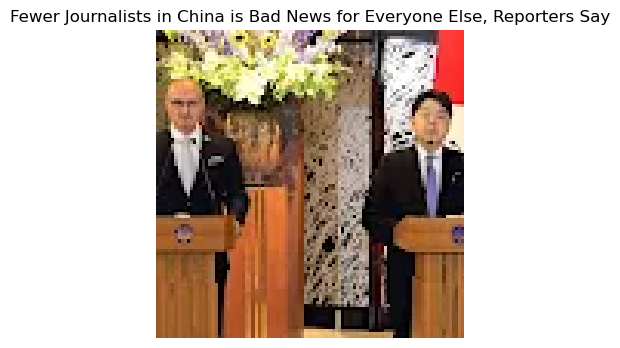

Link: https://news.google.com/articles/CBMibWh0dHBzOi8vd3d3LnZvYW5ld3MuY29tL2EvZmV3ZXItam91cm5hbGlzdHMtaW4tY2hpbmEtaXMtYmFkLW5ld3MtZm9yLWV2ZXJ5b25lLWVsc2UtcmVwb3J0ZXJzLXNheS83MjQ2MTc1Lmh0bWzSAW9odHRwczovL3d3dy52b2FuZXdzLmNvbS9hbXAvZmV3ZXItam91cm5hbGlzdHMtaW4tY2hpbmEtaXMtYmFkLW5ld3MtZm9yLWV2ZXJ5b25lLWVsc2UtcmVwb3J0ZXJzLXNheS83MjQ2MTc1Lmh0bWw?hl=en-US&gl=US&ceid=US%3Aen


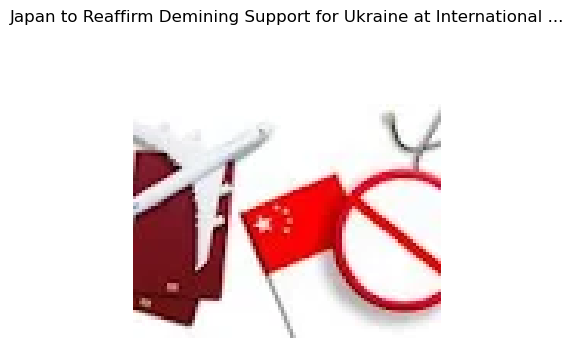

Link: https://news.google.com/articles/CBMiTWh0dHBzOi8vamFwYW5uZXdzLnlvbWl1cmkuY28uanAvcG9saXRpY3MvcG9saXRpY3MtZ292ZXJubWVudC8yMDIzMDgyOS0xMzI5NDcv0gEA?hl=en-US&gl=US&ceid=US%3Aen


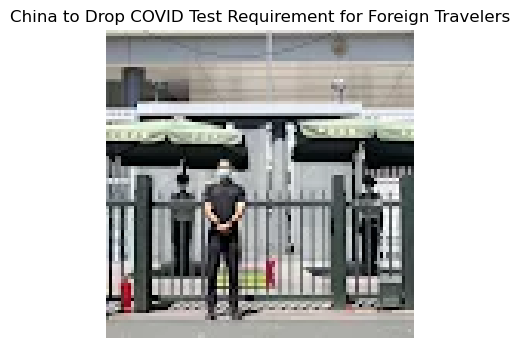

Link: https://news.google.com/articles/CBMidmh0dHBzOi8vd3d3LnVzbmV3cy5jb20vbmV3cy9oZWFsdGgtbmV3cy9hcnRpY2xlcy8yMDIzLTA4LTI4L2NoaW5hLXRvLWRyb3AtY292aWQtdGVzdC1yZXF1aXJlbWVudC1mb3ItZm9yZWlnbi10cmF2ZWxlcnPSAQA?hl=en-US&gl=US&ceid=US%3Aen


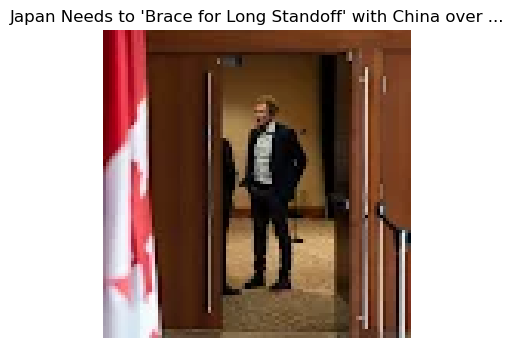

Link: https://news.google.com/articles/CBMiTWh0dHBzOi8vamFwYW5uZXdzLnlvbWl1cmkuY28uanAvcG9saXRpY3MvcG9saXRpY3MtZ292ZXJubWVudC8yMDIzMDgyOS0xMzMwNzAv0gEA?hl=en-US&gl=US&ceid=US%3Aen


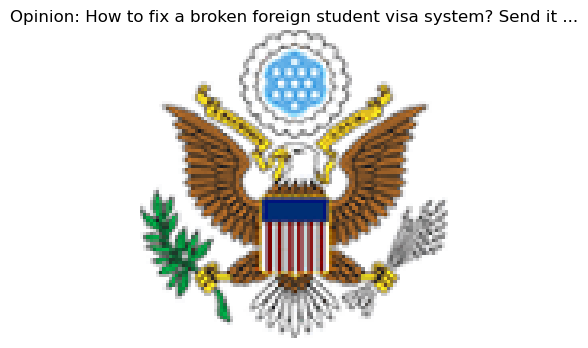

Link: https://news.google.com/articles/CBMigwFodHRwczovL3d3dy50aGVnbG9iZWFuZG1haWwuY29tL2J1c2luZXNzL2NvbW1lbnRhcnkvYXJ0aWNsZS1ob3ctdG8tZml4LWEtYnJva2VuLWZvcmVpZ24tc3R1ZGVudC12aXNhLXN5c3RlbS1zZW5kLWl0LWJhY2stdG8tc2Nob29sL9IBAA?hl=en-US&gl=US&ceid=US%3Aen


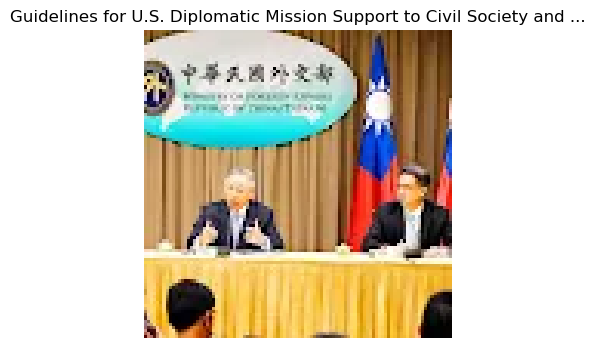

Link: https://news.google.com/articles/CBMic2h0dHBzOi8vbXgudXNlbWJhc3N5Lmdvdi9ndWlkZWxpbmVzLWZvci11LXMtZGlwbG9tYXRpYy1taXNzaW9uLXN1cHBvcnQtdG8tY2l2aWwtc29jaWV0eS1hbmQtaHVtYW4tcmlnaHRzLWRlZmVuZGVycy_SAQA?hl=en-US&gl=US&ceid=US%3Aen


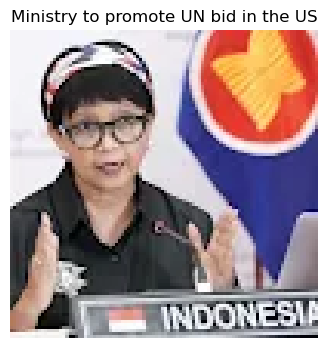

Link: https://news.google.com/articles/CBMiRWh0dHBzOi8vd3d3LnRhaXBlaXRpbWVzLmNvbS9OZXdzL2Zyb250L2FyY2hpdmVzLzIwMjMvMDgvMzAvMjAwMzgwNTQ4MNIBAA?hl=en-US&gl=US&ceid=US%3Aen


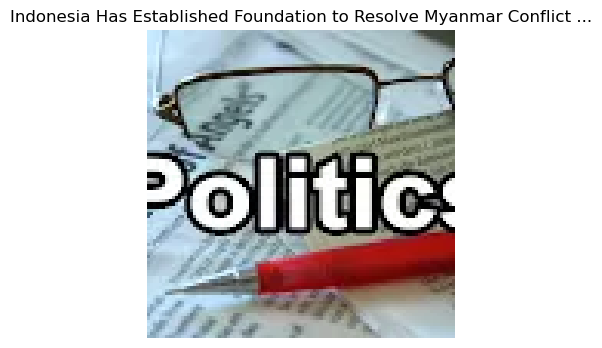

Link: https://news.google.com/articles/CBMid2h0dHBzOi8vZW4udGVtcG8uY28vcmVhZC8xNzY1Njg0L2luZG9uZXNpYS1oYXMtZXN0YWJsaXNoZWQtZm91bmRhdGlvbi10by1yZXNvbHZlLW15YW5tYXItY29uZmxpY3QtZm9yZWlnbi1taW5pc3Rlci1zYXlz0gF2aHR0cHM6Ly9lbi50ZW1wby5jby9hbXAvMTc2NTY4NC9pbmRvbmVzaWEtaGFzLWVzdGFibGlzaGVkLWZvdW5kYXRpb24tdG8tcmVzb2x2ZS1teWFubWFyLWNvbmZsaWN0LWZvcmVpZ24tbWluaXN0ZXItc2F5cw?hl=en-US&gl=US&ceid=US%3Aen


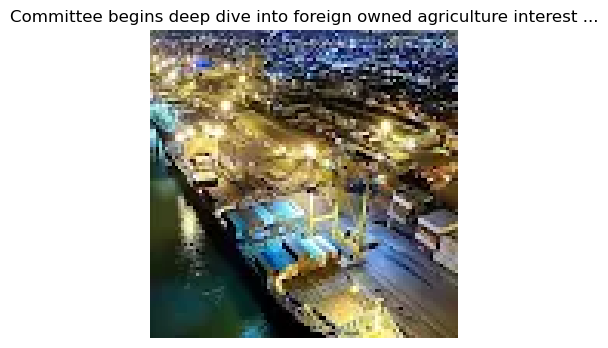

Link: https://news.google.com/articles/CBMiggFodHRwczovL3d3dy5yZWRoaWxsc21zbmV3cy5jb20vbW9zdC1yZWNlbnQvY29tbWl0dGVlLWJlZ2lucy1kZWVwLWRpdmUtZm9yZWlnbi1vd25lZC1hZ3JpY3VsdHVyZS1pbnRlcmVzdC1taXNzaXNzaXBwaS02NGVkMGU5NGJjNjFi0gEA?hl=en-US&gl=US&ceid=US%3Aen


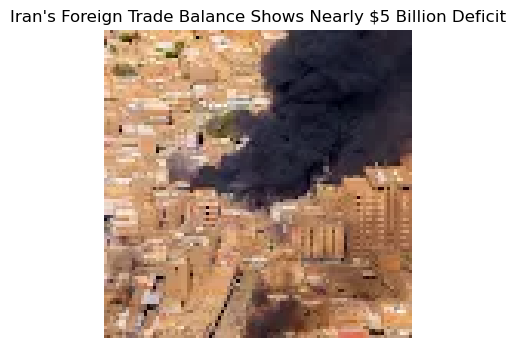

Link: https://news.google.com/articles/CBMiKGh0dHBzOi8vd3d3LmlyYW5pbnRsLmNvbS9lbi8yMDIzMDgyOTY4MTfSAQA?hl=en-US&gl=US&ceid=US%3Aen


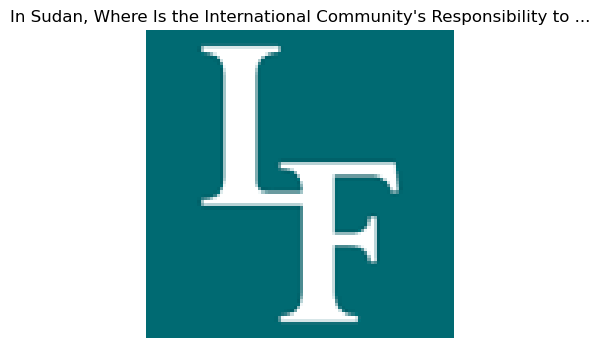

Link: https://news.google.com/articles/CBMia2h0dHBzOi8vYXJhYmNlbnRlcmRjLm9yZy9yZXNvdXJjZS9pbi1zdWRhbi13aGVyZS1pcy10aGUtaW50ZXJuYXRpb25hbC1jb21tdW5pdHlzLXJlc3BvbnNpYmlsaXR5LXRvLXByb3RlY3Qv0gEA?hl=en-US&gl=US&ceid=US%3Aen


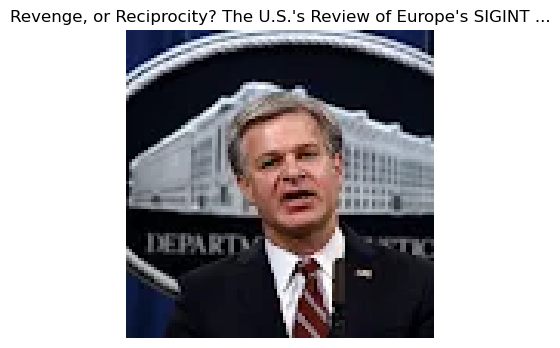

Link: https://news.google.com/articles/CBMia2h0dHBzOi8vd3d3Lmxhd2ZhcmVtZWRpYS5vcmcvYXJ0aWNsZS9yZXZlbmdlLW9yLXJlY2lwcm9jaXR5LXRoZS11LnMuLXMtcmV2aWV3LW9mLWV1cm9wZS1zLXNpZ2ludC1zYWZlZ3VhcmRz0gEA?hl=en-US&gl=US&ceid=US%3Aen


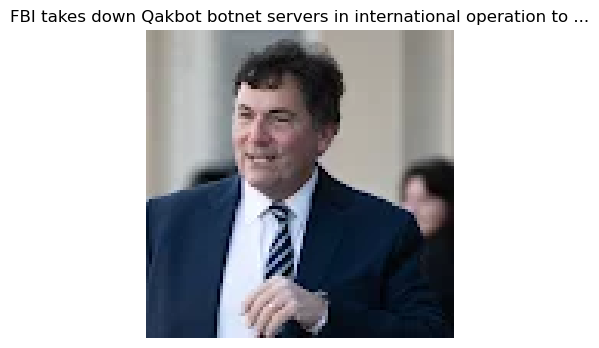

Link: https://news.google.com/articles/CBMiRWh0dHBzOi8vd3d3LmF4aW9zLmNvbS8yMDIzLzA4LzI5L2ZiaS1xYWtib3QtYm90bmV0LW5ldHdvcmstcmFuc29td2FyZdIBAA?hl=en-US&gl=US&ceid=US%3Aen


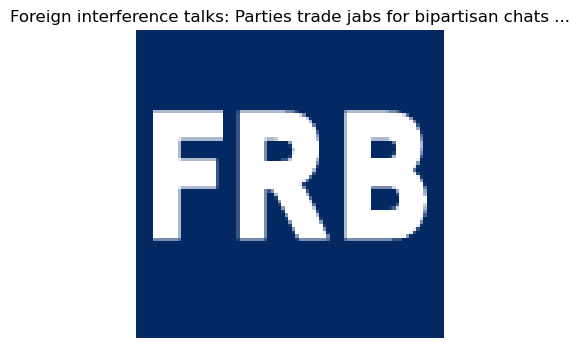

Link: https://news.google.com/articles/CBMifWh0dHBzOi8vd3d3LmN0dm5ld3MuY2EvcG9saXRpY3MvZm9yZWlnbi1pbnRlcmZlcmVuY2UtdGFsa3MtcGFydGllcy10cmFkZS1qYWJzLWZvci1iaXBhcnRpc2FuLWNoYXRzLWZyb20tdGhlLWNvdHRhZ2UtMS42NTMzNTI50gFCaHR0cHM6Ly9iZXRhLmN0dm5ld3MuY2EvbmF0aW9uYWwvcG9saXRpY3MvMjAyMy84LzI0LzFfNjUzMzUyOS5odG1s?hl=en-US&gl=US&ceid=US%3Aen


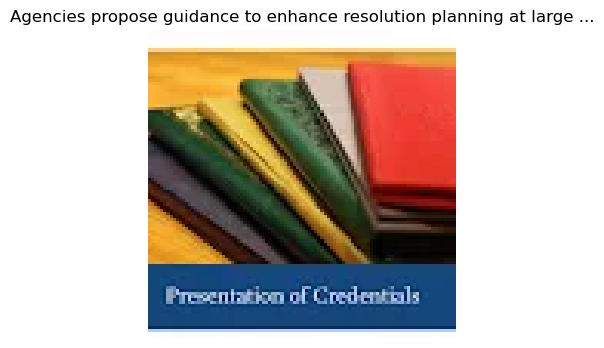

Link: https://news.google.com/articles/CBMiSmh0dHBzOi8vd3d3LmZlZGVyYWxyZXNlcnZlLmdvdi9uZXdzZXZlbnRzL3ByZXNzcmVsZWFzZXMvYmNyZWcyMDIzMDgyOWIuaHRt0gEA?hl=en-US&gl=US&ceid=US%3Aen


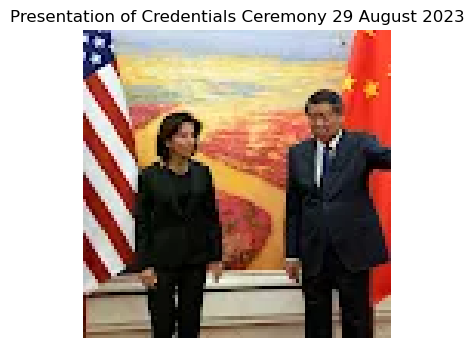

Link: https://news.google.com/articles/CBMigwFodHRwczovL3d3dy5tZmEuZ292LnNnL05ld3Nyb29tL1ByZXNzLVN0YXRlbWVudHMtVHJhbnNjcmlwdHMtYW5kLVBob3Rvcy8yMDIzLzA4L1ByZXNlbnRhdGlvbi1vZi1DcmVkZW50aWFscy1DZXJlbW9ueS0yOS1BdWd1c3QtMjAyM9IBAA?hl=en-US&gl=US&ceid=US%3Aen


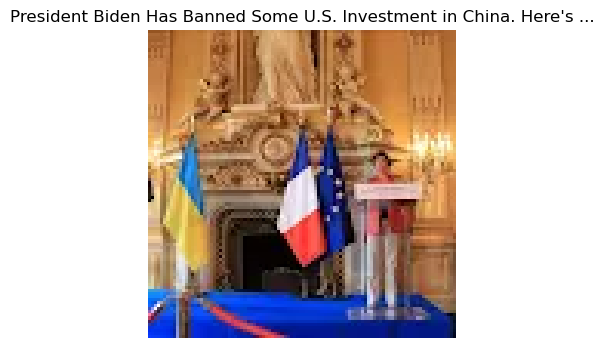

Link: https://news.google.com/articles/CBMiYGh0dHBzOi8vd3d3LmNmci5vcmcvaW4tYnJpZWYvcHJlc2lkZW50LWJpZGVuLWhhcy1iYW5uZWQtc29tZS11cy1pbnZlc3RtZW50LWNoaW5hLWhlcmVzLXdoYXQta25vd9IBAA?hl=en-US&gl=US&ceid=US%3Aen


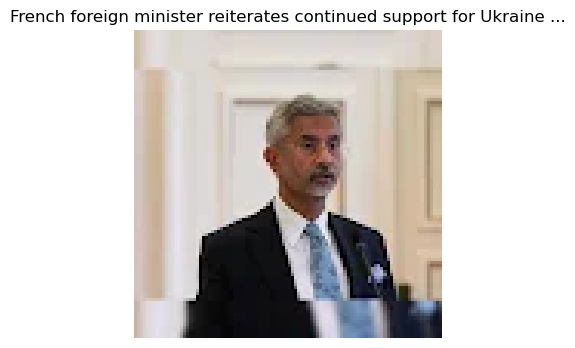

Link: https://news.google.com/articles/CBMieGh0dHBzOi8vd3d3LmFhLmNvbS50ci9lbi9ldXJvcGUvZnJlbmNoLWZvcmVpZ24tbWluaXN0ZXItcmVpdGVyYXRlcy1jb250aW51ZWQtc3VwcG9ydC1mb3ItdWtyYWluZS1hbWlkLXJ1c3NpYS13YXIvMjk3ODY4NdIBAA?hl=en-US&gl=US&ceid=US%3Aen


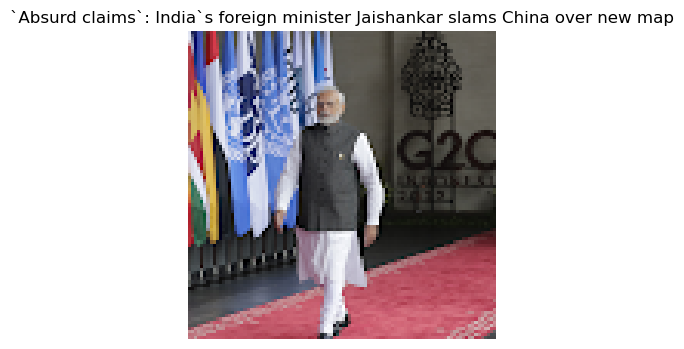

Link: https://news.google.com/articles/CBMic2h0dHBzOi8vd3d3Lndpb25ld3MuY29tL2luZGlhLW5ld3MvYWJzdXJkLWNsYWltcy1pbmRpYXMtZm9yZWlnbi1taW5pc3Rlci1qYWlzaGFua2FyLXNsYW1zLWNoaW5hLW92ZXItbmV3LW1hcC02MzAyNjLSAXdodHRwczovL3d3dy53aW9uZXdzLmNvbS9pbmRpYS1uZXdzL2Fic3VyZC1jbGFpbXMtaW5kaWFzLWZvcmVpZ24tbWluaXN0ZXItamFpc2hhbmthci1zbGFtcy1jaGluYS1vdmVyLW5ldy1tYXAtNjMwMjYyL2FtcA?hl=en-US&gl=US&ceid=US%3Aen


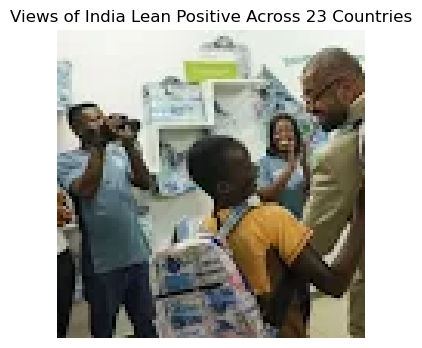

Link: https://news.google.com/articles/CBMiX2h0dHBzOi8vd3d3LnBld3Jlc2VhcmNoLm9yZy9nbG9iYWwvMjAyMy8wOC8yOS92aWV3cy1vZi1pbmRpYS1sZWFuLXBvc2l0aXZlLWFjcm9zcy0yMy1jb3VudHJpZXMv0gEA?hl=en-US&gl=US&ceid=US%3Aen


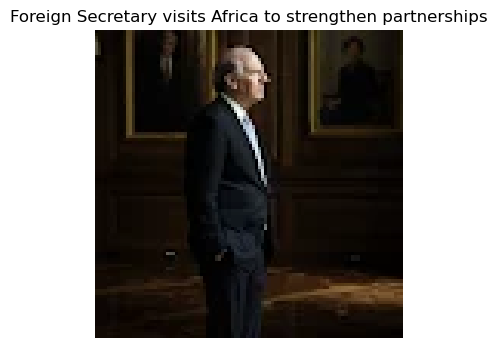

Link: https://news.google.com/articles/CBMiXWh0dHBzOi8vd3d3Lmdvdi51ay9nb3Zlcm5tZW50L25ld3MvZm9yZWlnbi1zZWNyZXRhcnktdmlzaXRzLWFmcmljYS10by1zdHJlbmd0aGVuLXBhcnRuZXJzaGlwc9IBAA?hl=en-US&gl=US&ceid=US%3Aen


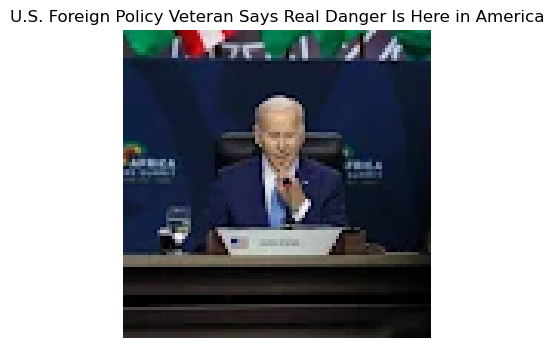

Link: https://news.google.com/articles/CBMiXGh0dHBzOi8vd3d3Lm55dGltZXMuY29tLzIwMjMvMDcvMDEvdXMvcG9saXRpY3MvcmljaGFyZC1oYWFzcy1iaWRlbi10cnVtcC1mb3JlaWduLXBvbGljeS5odG1s0gEA?hl=en-US&gl=US&ceid=US%3Aen


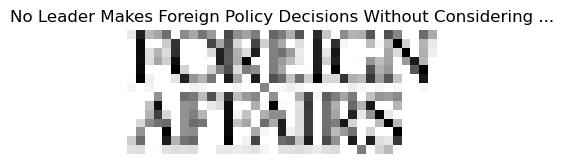

Link: https://news.google.com/articles/CBMigQFodHRwczovL2Nhcm5lZ2llZW5kb3dtZW50Lm9yZy8yMDIzLzAxLzE4L25vLWxlYWRlci1tYWtlcy1mb3JlaWduLXBvbGljeS1kZWNpc2lvbnMtd2l0aG91dC1jb25zaWRlcmluZy1kb21lc3RpYy1wb2xpdGljcy1wdWItODg4MjDSAQA?hl=en-US&gl=US&ceid=US%3Aen


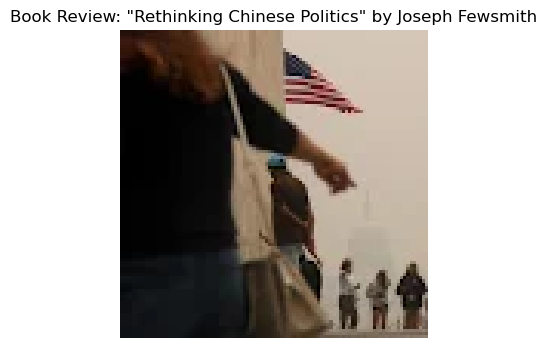

Link: https://news.google.com/articles/CBMiUWh0dHBzOi8vd3d3LmZvcmVpZ25hZmZhaXJzLmNvbS9yZXZpZXdzL2NhcHN1bGUtcmV2aWV3L3JldGhpbmtpbmctY2hpbmVzZS1wb2xpdGljc9IBAA?hl=en-US&gl=US&ceid=US%3Aen


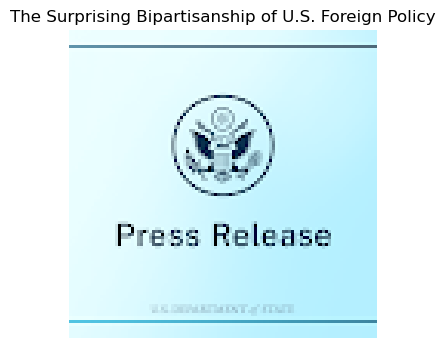

Link: https://news.google.com/articles/CBMiWGh0dHBzOi8vd3d3LmZvcmVpZ25hZmZhaXJzLmNvbS91bml0ZWQtc3RhdGVzL3N1cnByaXNpbmctYmlwYXJ0aXNhbnNoaXAtdXMtZm9yZWlnbi1wb2xpY3nSAQA?hl=en-US&gl=US&ceid=US%3Aen


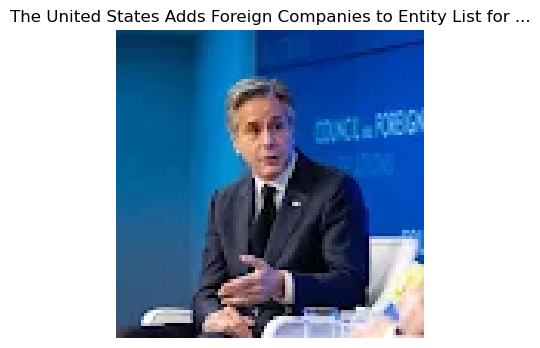

Link: https://news.google.com/articles/CBMib2h0dHBzOi8vd3d3LnN0YXRlLmdvdi90aGUtdW5pdGVkLXN0YXRlcy1hZGRzLWZvcmVpZ24tY29tcGFuaWVzLXRvLWVudGl0eS1saXN0LWZvci1tYWxpY2lvdXMtY3liZXItYWN0aXZpdGllcy0yL9IBAA?hl=en-US&gl=US&ceid=US%3Aen


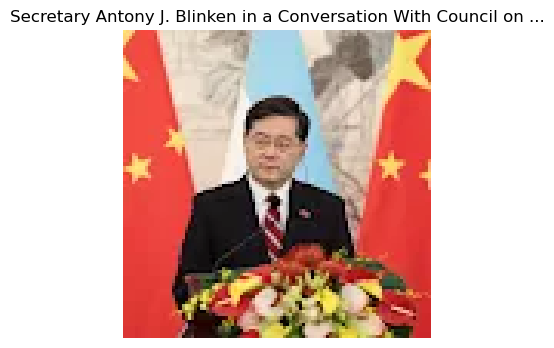

Link: https://news.google.com/articles/CBMifWh0dHBzOi8vd3d3LnN0YXRlLmdvdi9zZWNyZXRhcnktYW50b255LWotYmxpbmtlbi1pbi1hLWNvbnZlcnNhdGlvbi13aXRoLWNvdW5jaWwtb24tZm9yZWlnbi1yZWxhdGlvbnMtcHJlc2lkZW50LXJpY2hhcmQtaGFhc3Mv0gEA?hl=en-US&gl=US&ceid=US%3Aen


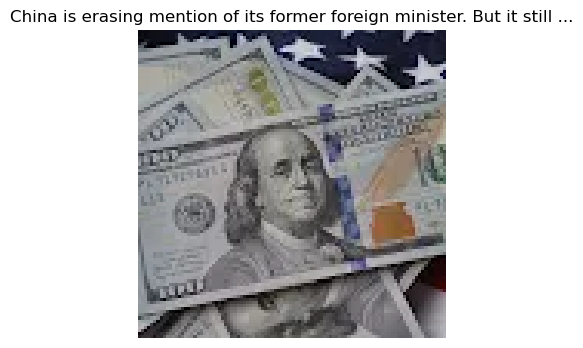

Link: https://news.google.com/articles/CBMiZWh0dHBzOi8vd3d3LmNubi5jb20vMjAyMy8wNy8yNi9jaGluYS94aS1qaW5waW5nLWZvcmVpZ24tbWluaXN0cnktcWluLWdhbmctd2FuZy15aS1pbnRsLWhuay9pbmRleC5odG1s0gFpaHR0cHM6Ly9hbXAuY25uLmNvbS9jbm4vMjAyMy8wNy8yNi9jaGluYS94aS1qaW5waW5nLWZvcmVpZ24tbWluaXN0cnktcWluLWdhbmctd2FuZy15aS1pbnRsLWhuay9pbmRleC5odG1s?hl=en-US&gl=US&ceid=US%3Aen


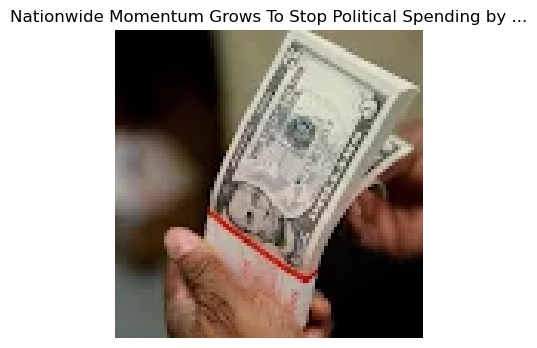

Link: https://news.google.com/articles/CBMihQFodHRwczovL3d3dy5hbWVyaWNhbnByb2dyZXNzLm9yZy9hcnRpY2xlL25hdGlvbndpZGUtbW9tZW50dW0tZ3Jvd3MtdG8tc3RvcC1wb2xpdGljYWwtc3BlbmRpbmctYnktZm9yZWlnbi1pbmZsdWVuY2VkLXUtcy1jb3Jwb3JhdGlvbnMv0gEA?hl=en-US&gl=US&ceid=US%3Aen


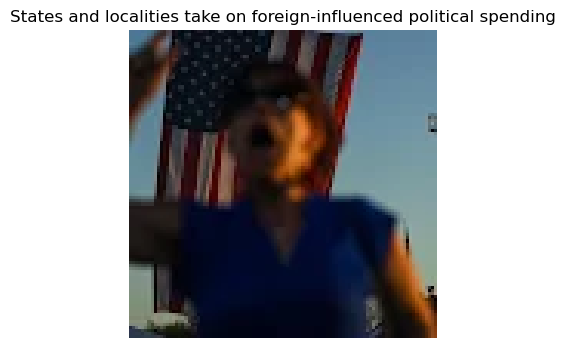

Link: https://news.google.com/articles/CBMidGh0dHBzOi8vd3d3LnJldXRlcnMuY29tL2xlZ2FsL2xlZ2FsaW5kdXN0cnkvc3RhdGVzLWxvY2FsaXRpZXMtdGFrZS1mb3JlaWduLWluZmx1ZW5jZWQtcG9saXRpY2FsLXNwZW5kaW5nLTIwMjMtMDUtMzAv0gEA?hl=en-US&gl=US&ceid=US%3Aen


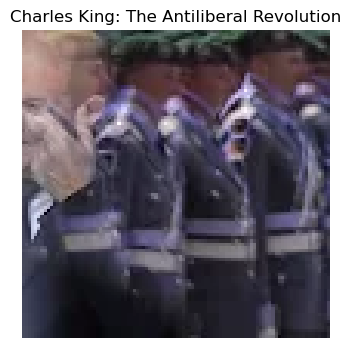

Link: https://news.google.com/articles/CBMiPWh0dHBzOi8vd3d3LmZvcmVpZ25hZmZhaXJzLmNvbS9yZXZpZXdzL2FudGlsaWJlcmFsLXJldm9sdXRpb27SAQA?hl=en-US&gl=US&ceid=US%3Aen


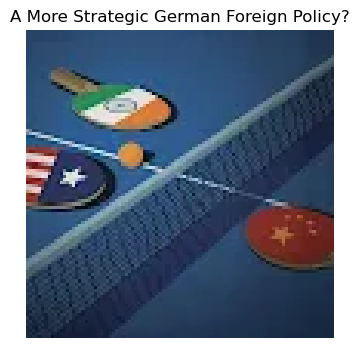

Link: https://news.google.com/articles/CBMiQWh0dHBzOi8vd3d3LmNmci5vcmcvaW4tYnJpZWYvbW9yZS1zdHJhdGVnaWMtZ2VybWFuLWZvcmVpZ24tcG9saWN50gFFaHR0cHM6Ly93d3cuY2ZyLm9yZy9pbi1icmllZi9tb3JlLXN0cmF0ZWdpYy1nZXJtYW4tZm9yZWlnbi1wb2xpY3k_YW1w?hl=en-US&gl=US&ceid=US%3Aen


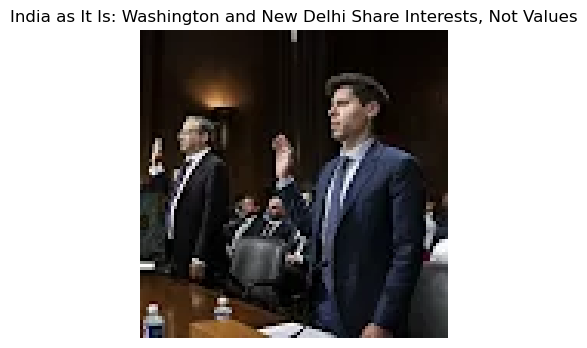

Link: https://news.google.com/articles/CBMiRGh0dHBzOi8vd3d3LmZvcmVpZ25hZmZhaXJzLmNvbS9pbmRpYS9tYXJrZXktbW9kaS1iaWRlbi11bml0ZWQtc3RhdGVz0gEA?hl=en-US&gl=US&ceid=US%3Aen


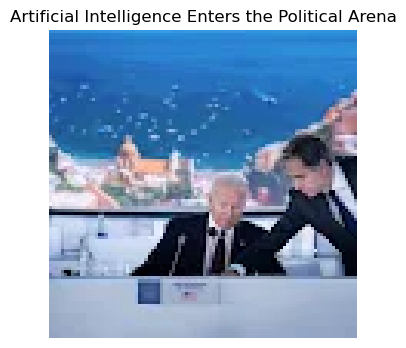

Link: https://news.google.com/articles/CBMiSWh0dHBzOi8vd3d3LmNmci5vcmcvYmxvZy9hcnRpZmljaWFsLWludGVsbGlnZW5jZS1lbnRlcnMtcG9saXRpY2FsLWFyZW5hLTDSAU1odHRwczovL3d3dy5jZnIub3JnL2Jsb2cvYXJ0aWZpY2lhbC1pbnRlbGxpZ2VuY2UtZW50ZXJzLXBvbGl0aWNhbC1hcmVuYS0wP2FtcA?hl=en-US&gl=US&ceid=US%3Aen


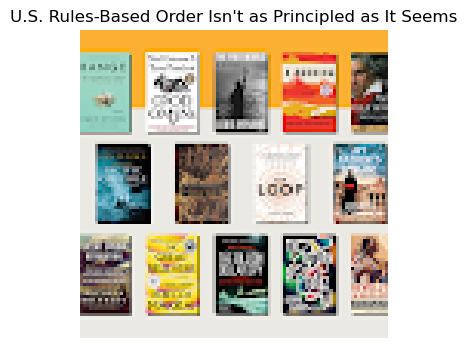

Link: https://news.google.com/articles/CBMiW2h0dHBzOi8vZm9yZWlnbnBvbGljeS5jb20vMjAyMy8wMy8yNy9zb21lLXJ1bGVzLW9mLWdsb2JhbC1wb2xpdGljcy1tYXR0ZXItbW9yZS10aGFuLW90aGVycy_SAQA?hl=en-US&gl=US&ceid=US%3Aen


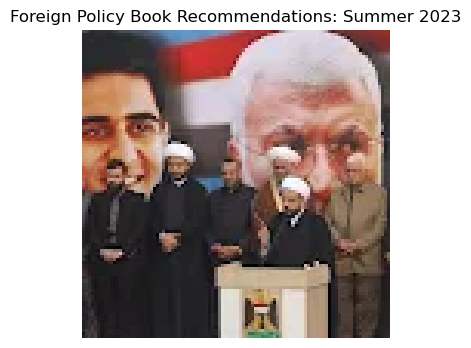

Link: https://news.google.com/articles/CBMibmh0dHBzOi8vZm9yZWlnbnBvbGljeS5jb20vMjAyMy8wNy8xNi9yZWFkaW5nLWxpc3QtYm9vay1yZWNvbW1lbmRhdGlvbnMtaW50ZXJuYXRpb25hbC1yZWxhdGlvbnMtaGlzdG9yeS1ub3ZlbHMv0gEA?hl=en-US&gl=US&ceid=US%3Aen


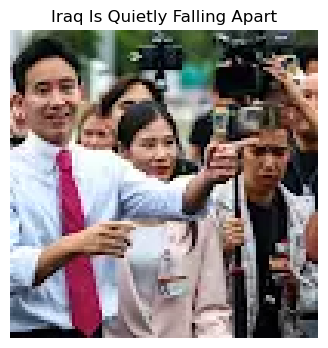

Link: https://news.google.com/articles/CBMiPmh0dHBzOi8vd3d3LmZvcmVpZ25hZmZhaXJzLmNvbS9pcmFuL2lyYXEtcXVpZXRseS1mYWxsaW5nLWFwYXJ00gEA?hl=en-US&gl=US&ceid=US%3Aen


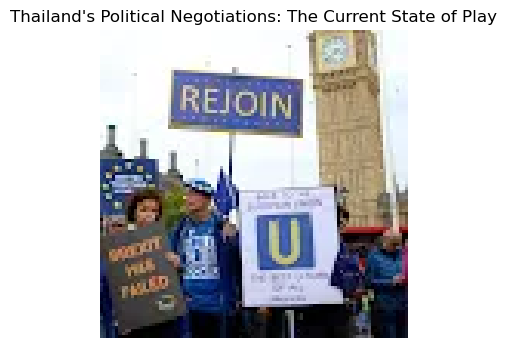

Link: https://news.google.com/articles/CBMiTGh0dHBzOi8vd3d3LmNmci5vcmcvYmxvZy90aGFpbGFuZHMtcG9saXRpY2FsLW5lZ290aWF0aW9ucy1jdXJyZW50LXN0YXRlLXBsYXnSAVBodHRwczovL3d3dy5jZnIub3JnL2Jsb2cvdGhhaWxhbmRzLXBvbGl0aWNhbC1uZWdvdGlhdGlvbnMtY3VycmVudC1zdGF0ZS1wbGF5P2FtcA?hl=en-US&gl=US&ceid=US%3Aen


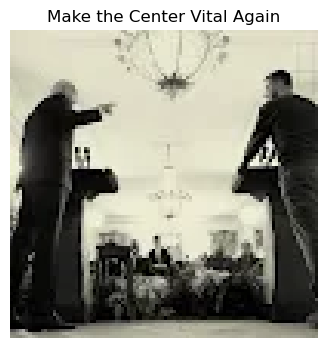

Link: https://news.google.com/articles/CBMiRGh0dHBzOi8vd3d3LmZvcmVpZ25hZmZhaXJzLmNvbS91bml0ZWQtc3RhdGVzL21ha2UtY2VudGVyLXZpdGFsLWFnYWlu0gEA?hl=en-US&gl=US&ceid=US%3Aen


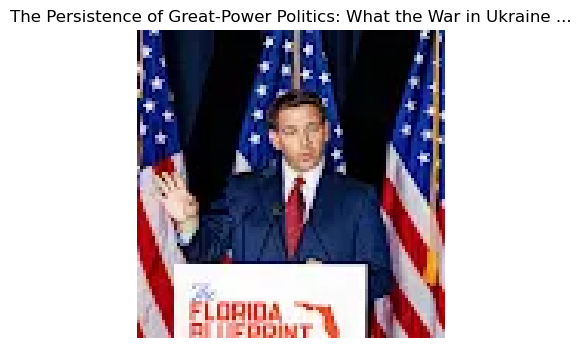

Link: https://news.google.com/articles/CBMiR2h0dHBzOi8vd3d3LmZvcmVpZ25hZmZhaXJzLmNvbS91a3JhaW5lL3BlcnNpc3RlbmNlLWdyZWF0LXBvd2VyLXBvbGl0aWNz0gEA?hl=en-US&gl=US&ceid=US%3Aen


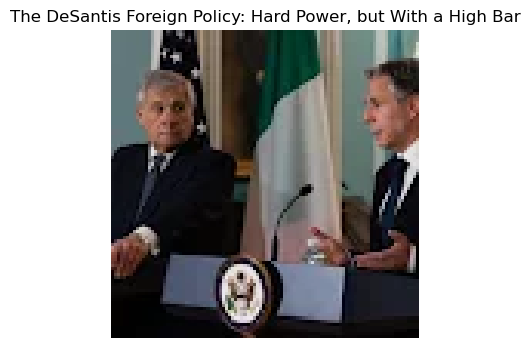

Link: https://news.google.com/articles/CBMiT2h0dHBzOi8vd3d3Lm55dGltZXMuY29tLzIwMjMvMDMvMjIvdXMvcG9saXRpY3Mvcm9uLWRlc2FudGlzLWZvcmVpZ24tcG9saWN5Lmh0bWzSAQA?hl=en-US&gl=US&ceid=US%3Aen


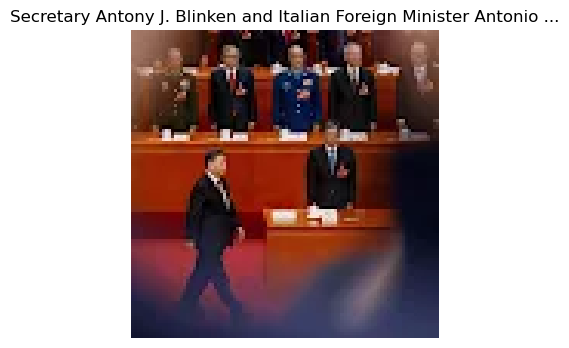

Link: https://news.google.com/articles/CBMie2h0dHBzOi8vd3d3LnN0YXRlLmdvdi9zZWNyZXRhcnktYW50b255LWotYmxpbmtlbi1hbmQtaXRhbGlhbi1mb3JlaWduLW1pbmlzdGVyLWFudG9uaW8tdGFqYW5pLWF0LWEtam9pbnQtcHJlc3MtYXZhaWxhYmlsaXR5L9IBAA?hl=en-US&gl=US&ceid=US%3Aen


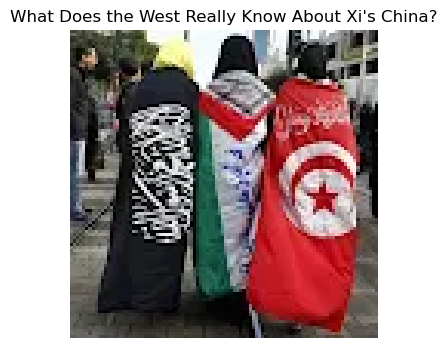

Link: https://news.google.com/articles/CBMiT2h0dHBzOi8vd3d3LmZvcmVpZ25hZmZhaXJzLmNvbS9jaGluYS93aGF0LWRvZXMtd2VzdC1yZWFsbHkta25vdy1hYm91dC14aXMtY2hpbmHSAQA?hl=en-US&gl=US&ceid=US%3Aen


MissingSchema: Invalid URL 'No Image Available': No scheme supplied. Perhaps you meant http://No Image Available?

In [30]:
from PIL import Image
import requests
from io import BytesIO


# Display thumbnails for each image
for index, row in dataG.iterrows():
    title = row['Title']
    link = row['Link']
    image_url = row['Image']
    
    response = requests.get(image_url)
    img = Image.open(BytesIO(response.content))
    
    plt.figure(figsize=(4, 4))
    plt.imshow(img)
    plt.title(title)
    plt.axis('off')
    plt.show()
    print(f"Link: {link}")


# <span style="color:red">TWEETS DATA UNDERSTANDING </span>

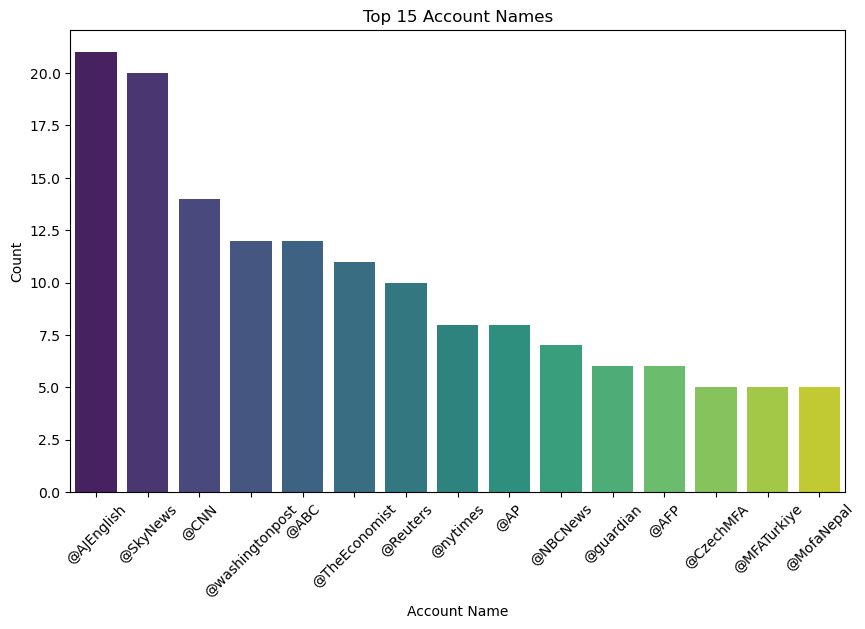

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Create a bar plot of the top N account names
n = 15  # Number of top account names to show
top_accounts = dataT["Account Name"].value_counts().head(n)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_accounts.index, y=top_accounts.values, palette="viridis")
plt.xlabel("Account Name")
plt.ylabel("Count")
plt.title(f"Top {n} Account Names")
plt.xticks(rotation=45)
plt.show()


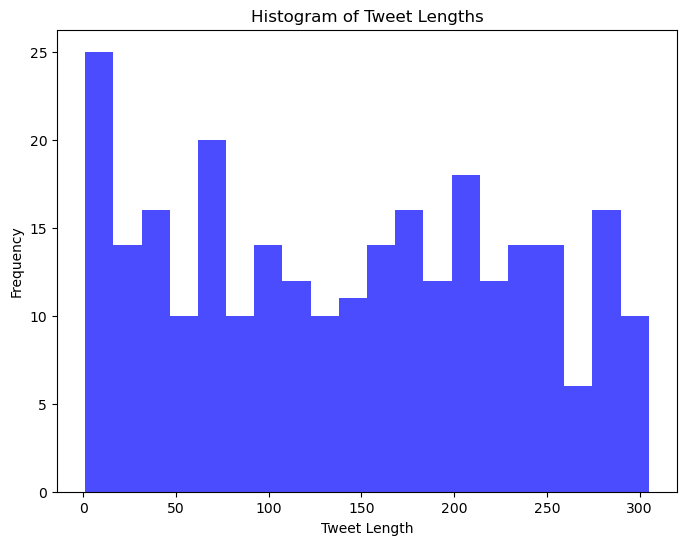

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate tweet lengths, converting to strings if necessary
dataT["Tweet Length"] = dataT["Tweet Text"].astype(str).apply(len)

# Create a histogram of tweet lengths
plt.figure(figsize=(8, 6))
plt.hist(dataT["Tweet Length"], bins=20, color='blue', alpha=0.7)
plt.xlabel("Tweet Length")
plt.ylabel("Frequency")
plt.title("Histogram of Tweet Lengths")
plt.show()


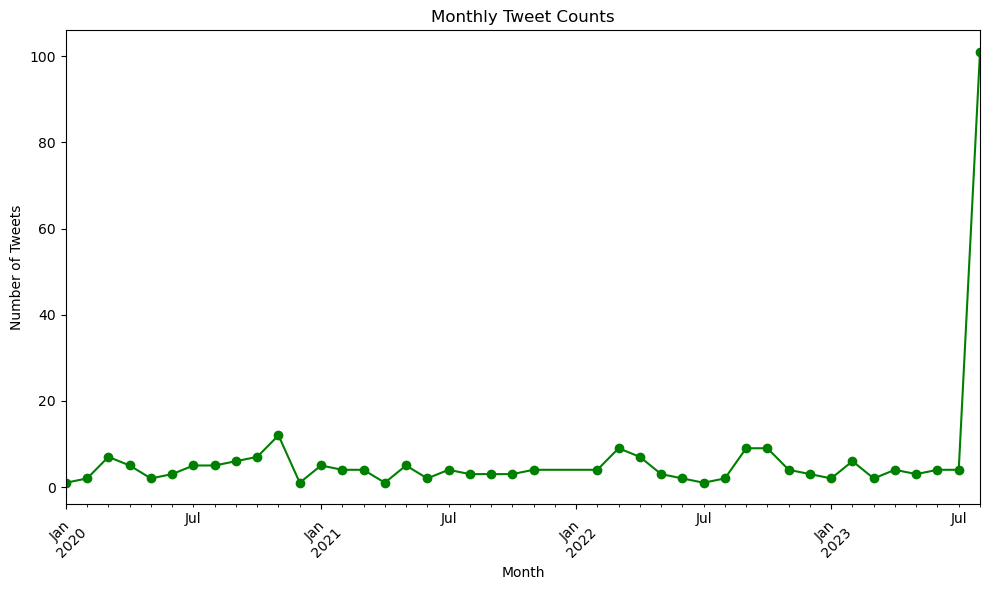

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert "Date" column to datetime data type
dataT["Date"] = pd.to_datetime(dataT["Date"])

# Group data by month and count the number of tweets per month
monthly_tweet_count = dataT.groupby(dataT["Date"].dt.to_period("M"))["Tweet Text"].count()

# Create a line plot of monthly tweet counts
plt.figure(figsize=(10, 6))
monthly_tweet_count.plot(kind="line", marker='o', color='green')
plt.xlabel("Month")
plt.ylabel("Number of Tweets")
plt.title("Monthly Tweet Counts")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [44]:
from IPython.display import HTML, display

# Filter out rows where the "Links" column is not NaN
filtered_data = dataT[pd.notna(dataT["Links"])]

# Display links from the "Links" column
for link_url in filtered_data["Links"]:
    display(HTML(f'<a href="{link_url}" target="_blank">{link_url}</a>'))


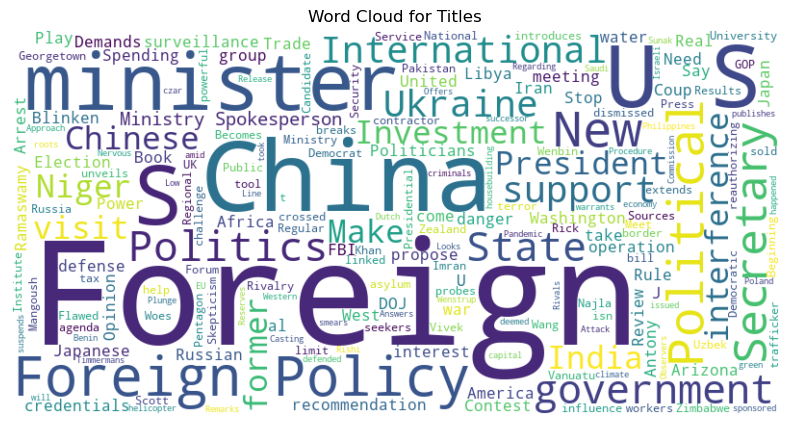

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud


# Create a word cloud for titles
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(dataG['Title']))

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Titles')
plt.axis('off')
plt.show()


# CHI-SQUARE

 test helps you understand if there's a significant association between these categorical variables. 
The p-value will indicate whether the association is statistically significant.

In [47]:
import pandas as pd
from scipy.stats import chi2_contingency

# Load your DataFrame (replace "your_data.csv" with your actual file)


# Create a cross-tabulation between two categorical variables
cross_tab = pd.crosstab(dataT["Tweet Text"], dataT["Account Name"])

# Perform a chi-square test
chi2, p, dof, expected = chi2_contingency(cross_tab)

print("Chi-Square:", chi2)
print("p-value:", p)
print("Degrees of Freedom:", dof)


Chi-Square: 14923.24166666667
p-value: 0.4358129273503988
Degrees of Freedom: 14896


no correlation : the observed counts in the cross-tabulation are similar to what would be expected if the two categorical variables were independent.
    p value less than 0,5

In [48]:
import pandas as pd
from scipy.stats import chi2_contingency

# Load your DataFrame (replace "your_data.csv" with your actual file)


# Create a cross-tabulation between two categorical variables
cross_tab = pd.crosstab(dataT["Tweet Text"], dataT["Date"])

# Perform a chi-square test
chi2, p, dof, expected = chi2_contingency(cross_tab)

print("Chi-Square:", chi2)
print("p-value:", p)
print("Degrees of Freedom:", dof)


Chi-Square: 42178.50000000001
p-value: 0.9047755629977853
Degrees of Freedom: 42560


no correlation : pvalue way too high 

# ============================

# <span style="color:red"> Data Modeling </span>

#  <span style="color:purple"> text classification </span>